# Linear Regression Models


_"There are three kinds of lies: lies, damned lies and statistics."_

    -- Mark Twain
    
_"Statistics is the art of lying by means of figures."_

    -- Dr. Wilhelm Stekhel
   
Among the statistical models used by analysts, regression models are the most common. A regression model allows one to estimate or predict a random variable as a function of several other variables. The estimated variable is called the __response variable, dependent variable__, and the variables used to predict the response are called __predictor variables, predictors, factors, independent variables, features__. Regression analysis assumes that all __predictor variables are quantitative__ so that arithmetic operations such as addition and multiplication are meaningful.    

### Terminology

* Response or dependent Variable: Estimated variable
* Predictor Variables: Variables used to predict the response
    Also called predictors or factors or features or independent variables
* Regression Model: Predict a response for a given set of predictor variables
* Linear Regression Models: Response is a linear function of predictors
* Simple Linear Regression Models: Only one predictor
* Miltiple Linear Regression Models: Several predictor variables
```

###  Linear Regression Model

Given $ n $ observation pairs $$ \{ (x_1, y_1), \ldots, (x_n, y_n) \}$$, the estimated response for the i-th observation is $$ \widehat{y}_i = b_0 + b_1 x_i $$ where the __regression parameters__ $ b_0 $ and $ b_1 $ are chosen that minimizes the __sum of squares of the errors (SSE)__ at the given data (observations).

Formally, the model has the form $$ \widehat{y} = b_0 + b_1 x $$ where, $ \widehat{y} $ is the predicted response when the predictor variable is $ x $.

The error is $$ e_i = y_i - \widehat{y}_i $$ and $$ SSE = \sum\limits_{i=1}^{n} e_i^2 = \sum\limits_{i=1}^{n}(y_i - b_0 - b_1 x_i)^2 $$.

The best linear model minimizes the sum of squared errors (__SSE__), subject to the constrained that the overall mean error is zero: $$\sum\limits_{i=1}^{n} e_i = \sum\limits_{i=1}^{n}(y_i - b_0 - b_1 x_i) = 0 $$.
>It can be shown that this constrained minimization problem is equivalent >to minimizing the _variance_ of errors.

###  Derivation of regression parameters

The error in the ith observation is:
 $$e_i = y_i -  \widehat{y} = y_i - (b_0 + b_1x_i)$$
 
For a sample of $n$ observations, the mean error is:  $$ \overline{e}  =  \overline{y}  - b_0 - b_1 \overline{x} $$

Setting the mean error to zero, we obtain:  $$b_0 = \overline{y}  -  b_1 \overline{x}$$  and  $$e_i = y_i-\widehat{y} = (y_i-\overline{y})-b_1(x_i -\overline{x})$$

For a sample of $n$ observations the mean error is : $$\overline{e}  = \frac{1}{n} \sum e_i=\overline{y}-b_0-b_1\overline{x}$$

The sum of squared errors $SSE$ is:


\begin{aligned} \operatorname{SSE} &=\sum_{i=1}^{n} e^{2} \\ &=\sum_{i=1}^{n}\left[\left(y_{i}-\bar{y}\right)^{2}-2 b_{1}\left(y_{i}-\bar{y}\right)\left(x_{i}-\bar{x}\right)+b_{i}^{2}\left(x_{i}-\bar{x}\right)^{2}\right] \end{aligned}



$$ \frac{SSE}{n-1}= \frac{1}{n-1}\sum (y_{i} - \overline{y})^{2}-\frac{2}{n-1}\sum (y_{i} - \overline{y})b_{1}(x_{i}-\overline{x})+b_{1}^{2}\frac{1}{n-1}\sum(x_{i}-\overline{x})^{2}= s_{y}^{2}-2b_{1}s_{xy}^{2}+b_{1}s_{x}^{2}$$

$$\frac{d}{db_{1}}(SSE)= -2s_{xy}^{2}+2b_{1}s_{x}^{2}=0$$

$$
b_{1}=\frac{s_{x y}^{2}}{s_{x}^{2}}=\frac{\Sigma x y-n \bar{x} \bar{y}}{\Sigma x^{2}-n(\bar{x})^{2}}
$$



###  Estimation of model parameters

Regression parameters that give minimum error variance are:

$$
b_{1}=\frac{s_{x y}^{2}}{s_{x}^{2}}=\frac{\Sigma x y-n \bar{x} \bar{y}}{\Sigma x^{2}-n(\bar{x})^{2}}
$$, 

$$b_0 = \bar{y}-b_1\bar{x} $$

where $\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i,\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_i,\sum {xy} = \sum_{i=1}^{n}x_iy_i,\sum {x^{2}} = \sum_{i=1}^{n}x_i^{2} $

### Example 1
The number of disk I/O’s and processor times of seven programs were measured as {(14, 2), (16, 5), (27, 7 (42, 9), (39, 10), (50, 13), (83, 20)}. Develop a linear regression model to predict CPU time as  a function of disk I/O’s.

In [11]:
# library imports

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from scipy import stats

In [12]:
df = pd.read_csv('example_1.txt', delimiter='\t', index_col=0)
print(list(df.columns))
df.columns = ['Disk_IOs','CPU_Time']
df

['Disk I/Os', 'CPU Time']


,Disk_IOs,CPU_Time
1,14,2
2,16,5
3,27,7
4,42,9
5,39,10
6,50,13
7,83,20


### Solving the least squares problem by hand

In [13]:
n = 7
SXY = sum(df.Disk_IOs * df.CPU_Time)
SX = sum(df.Disk_IOs)
SYY = sum(df.CPU_Time * df.CPU_Time)
SY = sum(df.CPU_Time)
SXX = sum(df.Disk_IOs * df.Disk_IOs)
X_mean = np.mean(df.Disk_IOs)
Y_mean = np.mean(df.CPU_Time)
print ("SXY = ", SXY, "SX=", SX, "SXX = ", SXX,"SY=",SY, "SYY = ", SYY, "X mean = ", X_mean, "Y mean = ", Y_mean)

SXY =  3375 SX= 271 SXX =  13855 SY= 66 SYY =  828 X mean =  38.714285714285715 Y mean =  9.428571428571429


The desired linear model is

  CPU time = –0.0083 + 0.2438(number of disk I/O’s) 
  
$b_{1}=\frac{\Sigma x y-n \overline{x y}}{\Sigma x^{2}-n(\bar{x})^{2}}=\frac{3375-7 \times 38.71 \times 9.43}{13,855-7 \times(38.71)^{2}}=0.2438$

$b_{0}=\bar{y}-b_{1} \bar{x}=9.43-0.2438 \times 38.71=-0.0083$


In [14]:
b_1= slope = (SXY-n*X_mean*Y_mean)/(SXX-n*(X_mean)**2)
X = df.Disk_IOs
b_0=intercept = Y_mean - slope*X_mean
Y = intercept + slope * X
print("f(t) = %f + %f * t" % (intercept, slope))

f(t) = -0.008282 + 0.243756 * t


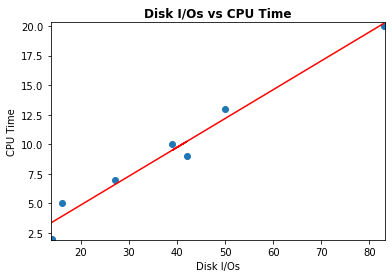

In [15]:

plt.plot(df.Disk_IOs, df.CPU_Time, 'o')
plt.plot(X, Y, color='red')
plt.margins(0.005)
plt.title("Disk I/Os vs CPU Time", weight='bold')
plt.xlabel("Disk I/Os")
plt.ylabel("CPU Time")
plt.show()

### Error Computation for Disk I/O’s and CPU Time Data 

In [16]:
#Estimate
predictedValues= intercept + slope * X
df['Estimate'] = predictedValues

#Error
e = df.CPU_Time-predictedValues
df['Error'] = e

#Error^2
e_2 = e**2
df['Error ^2'] = e_2
print(df)

   Disk_IOs  CPU_Time   Estimate     Error  Error ^2
1        14         2   3.404307 -1.404307  1.972078
2        16         5   3.891820  1.108180  1.228064
3        27         7   6.573140  0.426860  0.182210
4        42         9  10.229485 -1.229485  1.511634
5        39        10   9.498216  0.501784  0.251787
6        50        13  12.179536  0.820464  0.673161
7        83        20  20.223496 -0.223496  0.049951


In [17]:
SSE = sum(e_2)
SSE

5.868883792048928

In the above Table, we have listed the CPU time predicted by the model, the measured values, errors, and squared errors for each of the seven observations. The SSE is 5.869. This is the minimum possible SSE. Any other values of $b_0$ and $b_1$ would give a higher SSE.

###   Allocation of variation

**Error variance from the sample mean = Variance of the response from the mean value of the observation**

**The purpose of a model is to be able to predict the response with minimum variability.** Without a regression model, one can use the mean response as the predicted value for all values of the predictor variables. The errors in this case would be larger than those with the regression model. In fact, in this case, the error variance would be equal to the variance of the response, since 

$$Error= \varepsilon_{i}= \text{ Observed Response - mean value of Predicted Response} =y_{i}- \overline{y}$$

$$\text{Variance of Errors from the sample mean} =\frac{1}{n-1}\sum_{i=1}^{n}\epsilon_{i}^{2}=
 \frac{1}{n-1}\sum_{i=1}^{n}(y_{i}- \overline{y})^{2}=$$ variance of $y$.
 
 

Note that the standard error of the model is not the square root of the average value of the squared errors within the historical sample of data. Rather, the sum of squared errors is divided by $n-1$ rather than $n$ under the square root sign because this adjusts for the fact that $a$ "degree of freedom for error" has been used up by estimating one model parameter (namely the mean) from the sample of $n$ data points.

The sum of squared errors from the sample mean $SST= \sum_{i=1}^{n}(y_{i}-\overline{y})^{2}$ is called __total sum of squares__.  
It is a measure of $y$’s variability and is called variation of $y$. $SST$ can be
computed as follows:

$SST= \sum_{i=1}^{n}(y_{i}-\overline{y})^{2}=(\sum_{i=1}^{n}(y_{i}^{2})-n\overline{y}^{2}=
SSY-SS0$ 

Where, $SSY$ is the sum of squares of $y$ and SS0 is the sum of squares of $\overline{y}$ and is equal to $n\overline{y}^{2}$
The difference between $SST$ ans $SSE$ is the sum of squares explained by the
regression.

It is called $SSR$: $SSR = SST - SSE$ or  $SST = SSR + SSE$

The fraction of the variation that is explained by the regression line determines the goodness of the regression and it is called the coecient of determination, $$R^{2}= \frac{SSR}{SST}= \frac{SST-SSE}{SST}=1-\frac{SSE}{SST}$$. 

The higher the value of  $R^{2}$ the better the regression  $$R^{2}= 1 \rightarrow \text{Perfect fit}$$   $$R^{2}= 0 \rightarrow \text{No fit}$$

Shortcut formula for $SSE$:   $SSE= \sum(y^{2})-b_{0}\sum(y)-b_{1}\sum(xy)$

<img src="images/Project2--007.png">

The goodness of a regression is measured by $R^2$. The higher the value of R2, the better the regression. If the regression model is perfect in the sense that all observed values are equal to those predicted by the model, that is, all errors are zero, SSE is zero and the coefficient of determination is 1. On the other hand, if the regression model is so bad that it does not reduce the error variance at all, SSE is equal to SST and the coefficient of determination is zero.

The coefficient of determination is denoted by $R^2$ because it is also the square of the sample correlation $R_{xy}$ between the two variables:

$$
\text { Sample correlation }(x, y)=R_{\mathrm{xy}}=\frac{S_{xy}^2}{S_xS_y}
$$

In computing $R^2$, it is helpful to compute SSE using the following shortcut formula:


$$
\mathrm{SSE}=SYY-b_{0} SY-b_{1} SXY
$$

For the disk I/O-CPU time data of Example  the coefficient of determination can be computed as follows:




In [18]:
SSE = SYY-b_0*SY-b_1*SXY
SST = SYY - n*(Y_mean)**2
SSR = SST - SSE
RR = SSR/SST
RR

0.9714707037886506

Thus, the regression explains 97% of CPU time’s variation.



# Introduction to Statistics

__Application__ - Measuring the performance of a computer system

\begin{enumerate}
\item How should you report the performance as a single number?
\item Is specifying the mean the correct way to summarize a sequence of measurements? 
\item How should you report the variability of measured quantities? 
\item What are the alternatives to variance and when are they appropriate? 
\item How should you interpret the variability? 
\item How much confidence can you put on data with a large variability? 
\item  How many measurements are required to get a desired level of statistical confidence? 
\item How should you summarize the results of several different workloads on a single computer system? 
\item How should you compare two or more computer systems using several different workloads? 
\item Is comparing the mean performance sufficient? 
\item What model best describes the relationship between two variables? Also, how good is the model? 
\end{enumerate}


### Statistical Concepts

1.  __Independent Events__: Two events are called independent if the occurrence of one event does not in any way affect the probability of the other event. Thus, knowing that one event has occurred does not in any way change our estimate of the probability of the other event. 
2.  __Random Variable__: A variable is called a random variable if it takes one of a specified set of values with a specified probability. 
3.  __Cumulative Distribution Function__: The Cumulative Distribution Function (CDF) of a random variable maps a given value $a$ to the probability of the variable taking a value less than or equal to $a$: 
$$F_x(a) = P(x \leq a)$$ 

4.  __Probability Density Function__: The derivative  
$$
f(x)=\frac{dF(x)}{dx}
$$
of the CDF $F(x)$ is called the probability density function (pdf) of $x$. Given a pdf $f(x)$, the probability of $x$ being in the interval $(x_1, x_2)$ can also be computed by integration: 

$$
P\left(x_{1}<x \leq x_{2}\right)=F\left(x_{2}\right)-F\left(x_{1}\right)=\int_{x_{1}}^{x_{2}} f(x) d x
$$


5.  __Probability Mass Function__: For discrete random variable, the CDF is not continuous and, therefore, not differentiable. In such cases, the probability mass function (pmf) is used in place of pdf. Consider a discrete random variable $x$ that can take $n$ distinct values ${x_1, x_2, \ldots, x_n}$ with probabilities ${p_1, p_2, \ldots, p_n}$ such that the probability of the ith value $x_i$ is $p_i$. The pmf maps $x_i$ to $p_i$: 
$$f(x_i)=p_i$$.
The probability of $x$ being in the interval $(x_1, x_2)$ can also be computed by summation: 

$$
P\left(x_{1}<x \leq x_{2}\right)=F\left(x_{2}\right)-F\left(x_{1}\right)=\sum_{i \atop x_{1}<x_{i} \leq x_{2}} p_{i}
$$

6.  __Mean or Expected Value__: 

$$
\operatorname{Mean} \mu=E(x)=\sum_{i=1}^{n} p_{i} x_{i}=\int_{-\infty}^{+\infty} xf(x)dx
$$
Summation is used for discrete and integration for continuous variables, respectively. 

7.  __Variance__: The quantity $(x – \mu)^2$ represents the square of distance between $x$ and its mean. The expected value of this quantity is called the variance $x$: 

$$
\operatorname{Var}(x)=E\left[(x-\mu)^{2}\right]=\sum_{i=1}^{n} p_{i}\left(x_{i}-\mu\right)^{2}=\int_{-\infty}^{+\infty}\left(x_{i}-\mu\right)^{2}f(x)dx
$$


The variance is traditionally denoted by $\sigma^2$. The square root of the variance is called the standard deviation and is denoted by $\sigma$. 


8.  __Coefficient of Variation__: The ratio of the standard deviation to the mean is called the Coefficient of Variation (C.O.V.): 

$$
\text { C.O.V. }=\frac{\text { standard deviation }}{\text { mean }}=\frac{\sigma}{\mu}
$$


9.  __Covariance__: Given two random variables $x$ and $y$ with means $\mu_x$ and $\mu_y$, their covariance is 

$$
\operatorname{Cov}(x, y)=\sigma_{x y}^{2}=E\left[\left(x-\mu_{x}\right)\left(y-\mu_{y}\right)\right]=E(x y)-E(x) E(y)
$$


For independent variables, the covariance is zero since 
$$E(xy) = E(x)E(y)$$  


Although independence always implies zero covariance, the reverse is not true. It is possible for two variables to be dependent and still have zero covariance. 

10.  __Correlation Coefficient__: The normalized value of covariance is called the correlation coefficient or simply the correlation 

$$
\text { Correlation }(x, y)=\rho_{x y}=\frac{\sigma_{x y}^{2}}{\sigma_{x} \sigma_{y}}
$$

The correlation always lies between -1 and +1. 

11.  __Mean and Variance of Sums__: If $x_1, x_2, \ldots, x_k$ are $k$ random variables and if $a_1, a_2, \ldots, a_k$ are $k$ arbitrary constants (called weights), then 


\begin{array}{c}{E\left(a_{1} x_{1}+a_{2} x_{2}+\ldots+a_{k} x_{k}\right)=a_{1} E\left(x_{1}\right)+} \\ {a_{2} E\left(x_{2}\right)+\ldots+a_{k} E\left(x_{k}\right)}\end{array}



For independent variables, 


\begin{array}{l}{\operatorname{Var}\left(a_{1} x_{1}+a_{2} x_{2}+\ldots+a_{k} x_{k}\right)=a^{2} \operatorname{Var}\left(x_{1}\right)} \\ {\quad+a_{2}^{2} \operatorname{Var}\left(x_{2}\right)+\ldots+a_{k}^{2} \operatorname{Var}\left(x_{k}\right)}\end{array}


12.  __Quantile__: The x value at which the CDF takes a value $α$ is called the $\alpha$-quantile or 100$\ alpha$-percentile. It is denoted by $x_\alpha$ and is such that the probability of $x$ being less than or equal to $x_\alpha$ is $\alpha$: 

$$
P\left(x \leq x_{\alpha}\right)=F\left(x_{\alpha}\right)=\alpha
$$


13.  __Median__: The 50-percentile (or 0.5-quantile) of a random variable is called its median. 

14.  __Mode__: The most likely value, that is, $x_i$, that has the highest probability $p_i$, or the $x$ at which pdf is maximum, is called the mode of x. 

15.  __Normal Distribution__: This is the most commonly used distribution in data analysis. The sum of a large number of independent observations from any distribution has a normal distribution. Also known as Gaussian distribution, its pdf is given by 

$$
f(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-\mu)^{2} / 2 \sigma^{2}}, \quad-\infty \leq x \leq+\infty
$$

There are two parameters $\mu$ and $\sigma$, which are also the mean and standard deviations of x. A normal variate is denoted by $N(\mu, \sigma)$. A normal distribution with zero mean and unit variance is called a __unit normal__ or __standard normal distribution__ and is denoted as $N(0, 1)$. In statistical modeling, you will frequently need to use quantiles of the unit normal distribution. An $\alpha$-quantile of a unit normal variate $z ~ N(0, 1)$ is denoted by $z_\alpha$. If a random variable x has a $z \sim N(\mu, \sigma)$ distribution, then $(x - \mu)/\sigma$ has a $N(0, 1)$ distribution. Thus,

$$
P\left(\frac{x-\mu}{\sigma} \leq z_{\alpha}\right)=\alpha
$$

or 

$$
P\left(x \leq \mu+z_{\alpha} \sigma\right)=\alpha
$$

The areas under the unit normal pdf between 0 and z for various values of z are listed in various tables in statistics books or following python function:

    from math import *
    def phi(x):
        #'Cumulative distribution function for the standard normal distribution'
        return (1.0 + erf(x / sqrt(2.0))) / 2.0

There are two main reasons for the popularity of the normal distribution:

(a)  The sum of n independent normal variates is a normal variate. If $x_i \sim  N(\mu_i, \sigma_i)$, then $x=\sum_{i=1}^{n} a_{i} x_{i}$ has a normal distribution with mean $\mu=\sum_{i=1}^{n} a_{i} \mu_{i}$ and variance $\sigma^{2}=\sum_{i=1}^{n} a^{2} \sigma_{i}^{2}$ . As a result of this linearity property, normal processes remain normal after passing through linear systems, which are popular in electrical engineering.
(b)  The sum of a large number of independent observations from any distribution tends to have a normal distribution. This result, which is called the __central limit theorem__, is true for observations from all distributions. As a result of this property, experimental errors, which are contributed by many factors, are modeled with a normal distribution. 

### Expected Value of a Random Variable

Let $X$ be a random variable with a finite number of finite outcomes $${\displaystyle x_{1},x_{2},\ldots ,x_{k}}$$ occurring with probabilities $${\displaystyle p_{1},p_{2},\ldots ,p_{k},}$$ respectively. The expectation of $X$ is defined as

$$
\mathrm{E}[X]=\sum_{i=1}^{k} x_{i} p_{i}=x_{1} p_{1}+x_{2} p_{2}+\cdots+x_{k} p_{k}
$$

Since all probabilities $p_{i}$ add up to 1 $({\displaystyle p_{1}+p_{2}+\cdots +p_{k}=1})$, the expected value is the weighted average, with $p_{i}$’s being the weights.

If all outcomes $x_{i}$ are equiprobable (that is, ${\displaystyle p_{1}=p_{2}=\cdots =p_{k}})$, then the weighted average turns into the simple average. If the outcomes $x_{i}$ are not equiprobable, then the simple average must be replaced with the weighted average, which takes into account the fact that some outcomes are more likely than the others.

### Variation and Standard Deviation of a Random Variable


The formula for the sample standard deviation is

$$
s=\sqrt{\frac{1}{N-1} \sum_{i=1}^{N}\left(x_{i}-\bar{x}\right)^{2}}
$$

where ${\displaystyle \textstyle \{x_{1},\,x_{2},\,\ldots ,\,x_{N}\}}$ are the observed values of the sample items, $\textstyle {\bar {x}}$ is the mean value of these observations, and $N$ is the number of observations in the sample.

There are two parameters $\mu$ and $\sigma$, which are also the mean and standard deviations of $x$. A normal variate is denoted by $N(\mu, \sigma)$. A normal distribution with zero mean and unit variance is called a unit normal or standard normal distribution and is denoted as $N(O, 1)$. In statistical modeling, you will frequently need to use quantiles of the unit normal distribution. An $\alpha$-quantile of a unit normal variate $z ~ N(0, 1)$ is denoted by $z_\alpha$. If a random variable $x$ has a $N(\mu, \sigma)$ distribution, then $(x – \mu)/\sigma$ has a $N(0, 1)$ distribution. Thus,


$$
P\left(\frac{x-\mu}{\sigma} \leq z_{\alpha}\right)=\alpha
$$

or 

$$
P\left(x \leq \mu+z_{\alpha} \sigma\right)=\alpha
$$


The areas under the unit normal pdf between 0 and z for various values of z can be found from appropriate tables or computed by appropriate functions. 



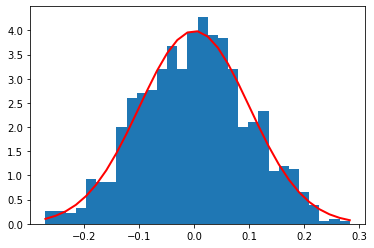

In [19]:
#Examples

#Draw samples from the distribution:


mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
#Verify the mean and the variance:


abs(mu - np.mean(s)) < 0.01


abs(sigma - np.std(s, ddof=1)) < 0.01

#Display the histogram of the samples, along with the probability density function:


import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()


There are two main reasons for the popularity of the normal distribution:

(a)  The sum of $n$ independent normal variates is a normal variate. If $x_i \approx N(\mu_i, \sigma_i)$, then $x=\sum_{i=1}^{n} a_{i} x_{i}$ has a normal distribution with mean $\mu=\sum_{i=1}^{n} a_{i} \mu_{i}$ and variance $\sigma^{2}=\sum_{i=1}^{n} a_{i}^{2} \sigma_{i}^{2}$. As a result of this linearity property, normal processes remain normal after passing through linear systems, which are popular in electrical engineering.
(b)  The sum of a large number of independent observations from any distribution tends to have a normal distribution. This result, which is called the __central limit theorem__, is true for observations from all distributions. As a result of this property, experimental errors, which are contributed by many factors, are modeled with a normal distribution. 


### SUMMARIZING DATA BY A SINGLE NUMBER
In the most condensed form, a single number may be presented that gives the key characteristic of the data set. This single number is usually called an __average__ of the data. To be meaningful, this average should be representative of a major part of the data set. Three popular alternatives to summarize a sample are to specify its __mean, median, or mode__. These measures are what statisticians call __indices of central tendencies__. The name is based on the fact that these measures specify the center of location of the distribution of the observations in the sample.

__Sample mean__ is obtained by taking the sum of all observations and dividing this sum by the number of observations in the sample. __Sample median__ is obtained by sorting the observations in an increasing order and taking the observation that is in the middle of the series. If the number of observations is even, the mean of the middle two values is used as a median. __Sample mode__ is obtained by plotting a histogram and specifying the midpoint of the bucket where the histogram peaks. For categorical variables, mode is given by the category that occurs most frequently.

The word __sample__ in the names of these indices signifies the fact that the values obtained are based on just one sample. However, if it is clear from the context that the discussion is about a single sample, and there is no ambiguity, the shorter names __mean, median, and mode__ can be used.

Mean and median always exist and are unique. Given any set of observations, the mean and median can be determined. Mode, on the other hand, may not exist. An example of this would be if all observations were equal. In addition, even if modes exist, they may not be unique. There may be more than one mode, that is, there may be more than one local peak in the histogram.

<img src="images/Figure12.1.png">

FIGURE 1  Five distributions showing relationships among mean, median, and mode.


The three indices are generally different. Figure 1 shows five different pdf’s. Distribution (a) has a unimodal, symmetrical pdf. In this case, the mode exists with the mean, median, and mode being equal. Distribution (b) has a bimodal, symmetrical pdf. In this case, the mode is not unique. The median and mean are equal. Distribution (c) is a uniform density function. There is no mode and the mean and median are equal. Distribution (d) has a pdf skewed to the right (with a tail toward the right). For this distribution, the value of the mean is greater than the median, which in turn is greater than the mode. Finally, distribution (e) has a pdf skewed to the left; that is, it has a tail on the left. In this case, the mean is less than the median, which is less than the mode.

The main problem with the mean is that it is affected more by outliers than the median or mode. A single outlier can make a considerable change in the mean. This is particularly true for small samples. Median and mode are resistant to several outlying observations.

The mean gives equal weight to each observation and in this sense makes full use of the sample. Median and mode ignore a lot of the information.

The mean has an additivity or linearity property in that the mean of a sum is a sum of the means. This does not apply to the mode or median.

### SELECTING AMONG THE MEAN, MEDIAN, AND MODE
A common mistake inexperienced analysts make is to specify the wrong index of central tendency. For example, it is common to specify the mean regardless of its validity in a particular situation. 

The flow chart of Figure 12.2 shows a set of guidelines to select a proper index of central tendency. The first consideration is the type of variable. If the variable is categorical, the mode is the proper single measure that best describes that data. An example of categorical data is the type of microprocessor in various workstations. A statement such as “the most frequent microprocessor used in workstations is the 68000” makes sense. The mean or median of the type of processor is meaningless.

 


The second consideration in selecting the index is to ask whether the total of all observations is of any interest. If yes, then the mean is a proper index of central tendency. For example, total CPU time for five queries is a meaningful number. On the other hand, if we count number of windows on the screen during each query, the total number of windows during five queries does not seem to be meaningful. If the total is of interest, specify the mean. 

 <img src="images/Figure12.2.png">
 
FIGURE 2  Selecting among the mean, meadian, and mode.

If the total is of no interest, one has to choose between median and mode. If the histogram is symmetrical and unimodal, the mean, median, and mode are all equal and it does not really matter which one is specified. 

If the histogram is skewed, the median is more representative of a typical observation than the mean. For example, the number of disk drives on engineering workstations is expected to have skewed distribution, and therefore, it is appropriate to specify the median number. One simple to way to determine skewness for small samples is to examine the ratio of the maximum and minimum, ymax/ymin, of the observations. If the ratio is large, the data is skewed.

The following are examples of selections of indices of central tendencies:

* Most Used Resource in a System: Resources are categorical and hence the mode must be used. 
*  Interarrival Time: Total time is of interest and so the mean is the proper choice. 
*  Load on a Computer: The median is preferable due to a highly skewed distribution. 
* Average Configuration: Medians of number devices, memory sizes, and number of processors are generally used to specify the configuration due to the skewness of the distribution. 

### SUMMARIZING VARIABILITY

_Then there is the man who drowned crossing a stream with an average depth of six inches._

— W. I. E. Gates

Given a data set, summarizing it by a single number is rarely enough. It is important to include a statement about its variability in any summary of the data. This is because given two systems with the same mean performance, one would generally prefer one whose performance does not vary much from the mean. For example, Figure 3 shows histograms of the response times of two systems. Both have the same mean response time of 2 seconds. In case (a), the response time is always close to its mean value, while in case (b), the response time can be 1 millisecond sometimes and 1 minute at other times. Which system would you prefer? Most people would prefer the system with low variability. 

<img src="images/Figure12.3.png">
FIGURE 12.3  Histograms of response times of two systems.

Variability is specified using one of the following measures, which are called indices of dispersion:

*  Range — minimum and maximum of the values observed 
*  Variance or standard deviation 
*  10- and 90-percentiles 
*  Semi-interquantile range 
*  Mean absolute deviation 


The range of a stream of values can be easily calculated by keeping track of the minimum and the maximum. The variability is measured by the difference between the maximum and the minimum. The larger the difference, the higher the variability. In most cases, the range is not very useful. The minimum often comes out to be zero and the maximum comes out to be an “outlier” far from typical values. Unless there is a reason for the variable to be bounded between two values, the maximum goes on increasing with the number of observations, the minimum goes on decreasing with the number of observations, and there is no “stable” point that gives a good indication of the actual range. The conclusion is that the range is useful if and only if there is a reason to believe that the variable is bounded. The range gives the best estimate of these bounds.

The variance of a sample of n observations ${x_1, x_2, \dots, x_n}$ is calculated as follows:

$$
s^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^2 \quad \text { where } \quad \bar{x}=\frac{1}{n} \sum_{i=1}^{n} x_{i}
$$

The quantity $s^2$ is called the **sample variance** and its square root s is called the **sample standard deviation**. The word sample can be dropped if there is no ambiguity and it it is clear from the context that the quantities refer to just one sample. Notice that in computing the variance, the sum of squares  is divided by $n - 1$ and not n. This is because only $n - 1$ of the n differences  are independent. Given $n - 1$ differences, the nth difference can be computed since the sum of all $n$ differences must be zero. The number of independent terms in a sum is also called its *degrees of freedom*.






In practice, the main problem with variance is that it is expressed in units that are the square of the units of the observations. For example, the variance of response time could be 4 seconds squared or 4,000,000 milliseconds squared. Changing the unit of measurement has a squared effect on the numerical magnitude of the variance. For this reason, it is preferable to use the standard deviation. It is in the same unit as the mean, which allows us to compare it with the mean. Thus, if the mean response time is 2 seconds and the standard deviation is 2 seconds, there is considerable variability. On the other hand, a standard deviation of 0.2 second for the same mean would be considered small. In fact, the ratio of standard deviation to the mean, or the coefficient of variation (C.O.V.), is even better because it takes the scale of measurement (unit of measurement) out of variability consideration. A C.O.V. of 5 is large, and a C.O.V. of 0.2 (or 20%) is small no matter what the unit is. 

Percentiles are also a popular means of specifying dispersion. Specifying the 5-percentile and the 95-percentile of a variable has the same impact as specifying its minimum and maximum. However, it can be done for any variable, even for variables without bounds. When expressed as a fraction between 0 and 1 (instead of a percentage), the percentiles are also called quantiles. Thus 0.9-quantile is the same as 90-percentile. 

Another term used is fractile, which is synonymous with quantile. The percentiles at multiples of 10% are called deciles. Thus, the first decile is 10-percentile, the second decile is 20-percentile, and so on. Quartiles divide the data into four parts at 25, 50, and 75%. Thus, 25% of the observations are less than or equal to the first quartile $Q_1$, 50% of the observations are less than or equal to the second quartile $Q_2$, and 75% are less than or equal to the third quartile $Q_3$. Notice that the second quartile $Q_2$ is also the median. The $\alpha$-quantiles can be estimated by sorting the observations and taking the $[(n-1)\alpha+1]$th element in the ordered set. Here, $[.]$ is used to denote rounding to the nearest integer. For quantities exactly halfway between two integers, use the lower integer.

The range between $Q_3$ and $Q_1$ is called the interquartile range of the data. One half of this range is called Semi-Interquartile Range (SIQR), that is,

$$
\operatorname{SIQR}=\frac{Q_{3}-Q_{1}}{2}=\frac{x_{0.75}-x_{0.25}}{2}
$$

Another measure of dispersion is the mean absolute deviation, which is calculated as follows:

$$
\text { Mean absolute deviation }=\frac{1}{n} \sum_{i=1}^{n}\left|x_{i}-x\right|
$$

The key advantage of the mean absolute deviation over the standard deviation is that no multiplication or square root is required. 

Among the preceding indices of dispersion, the range is affected considerably by outliers. The sample variance is also affected by outliers, but the effect is less than that on the range. The mean absolute deviation is next in resistance to outliers. The semi-interquantile range is very resistant to outliers. It is preferred to the standard deviation for the same reasons that the median is preferred to the mean. Thus, if the distribution is highly skewed, outliers are highly likely and the SIQR is more representative of the spread in the data than the standard deviation. In general, the SIQR is used as an index of dispersion whenever the median is used as an index of central tendency.

Finally, it should be mentioned that all of the preceding indices of dispersion apply only for quantitative data. For qualitative (categorical) data, the dispersion can be specified by giving the number of most frequent categories that comprise the given percentile, for instance, the top 90%.

\begin{example}
In an experiment, which was repeated 32 times, the measured CPU time was found to be {3.1, 4.2, 2.8, 5.1, 2.8, 4.4, 5.6, 3.9, 3.9, 2.7, 4.1, 3.6, 3.1, 4.5, 3.8, 2.9, 3.4, 3.3, 2.8, 4.5, 4.9, 5.3, 1.9, 3.7, 3.2, 4.1, 5.1, 3.2, 3.9, 4.8, 5.9, 4.2}. The sorted set is {1.9, 2.7, 2.8, 2.8, 2.8, 2.9, 3.1, 3.1, 3.2 3.2, 3.3, 3.4, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4.1, 4.1, 4.2, 4.2, 4.4, 4.5, 4.5, 4.8, 4.9, 5.1, 5.1, 5.3, 5.6, 5.9}. Then 

    The 10-percentile is given by [1 + (31)(0.10)] = 4th element = 2.8. 
      
    The 90-percentile is given by [1 + (31)(0.90)] = 29th element = 5.1.
    
    The first quartile $Q_1$ is given by [1 + (31)(0.25)] = 9th element = 3.2. 
    
    The median $Q_2$ is given by [1 + (31)(0.50)] = 16th element = 3.9. 
    
    The third quartile $Q_3$ is given by [1 + (31)(0.75)] = 24th element = 4.5. 
\end{example}


Thus, 

$$
\mathrm{SIOR}=\frac{Q_{3}-Q_{1}}{2}=\frac{4.5-3.2}{2}=0.65
$$



### Summarizing Observations 
Given: A sample ${x_1, x_2, \dots, x_n}$ of n observations. 
1.  Sample arithmetic mean:  $\bar{x}=\frac{1}{n} \sum_{i=1}^{n} x_{i}$
2.  Sample geometric mean:  $\dot{x}=\left(\prod_{i=1}^{n} x_{i}\right)^{1 / n}$
3.  Sample harmonic mean:  $x=\frac{n}{\frac{1}{x_{1}}+\frac{1}{x_{2}}+\cdots+\frac{1}{x_{n}}}$
4.  Sample median: $$\left\{\begin{array}{ll}{x_{((n-1) / 2)}} & {\text { if } n \text { is odd }} \\ {0.5\left(x_{(n / 2)}+x_{((1+n) / 2)}\right)} & {\text { otherwise }}\end{array}\right.$$
Here x(i) is the ith observation in the sorted set. 
5.  Sample mode = observation with the highest frequency (for categorical data). 
6.  Sample variance:  $s^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}$
7.  Sample standard deviation:  $s=\sqrt{\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}$
8.  Coefficient of variation =  $\frac{s}{\bar{x}}$
9.  Coefficient of skewness =  $=\frac{1}{n s^{3}} \sum_{i=1}^{n}\left(x_{i}-\bar x\right)^{3}$
10.  Range: Specify the minimum and maximum. 
11.  Percentiles: 100p-percentile  
12.  Semi-interquartile range  $\mathrm{SIQR}=\frac{Q_{3}-Q_{1}}{2}=\frac{x_{0.75}-x_{025}}{2}$
13.  Mean absolute deviation $=\frac{1}{n} \sum_{i=1}^{n}\left|x_{i}-\bar{x}\right|$

### DETERMINING DISTRIBUTION OF DATA
In the last two cells we discussed how a measured data set could be summarized by stating its average and variability. The next step in presenting a summary could be to state the type of distribution the data follows. For example, a statement that the number of disk I/O’s are uniformly distributed between 1 and 25 is a more meaningful summary than to specify only that the mean is 13 and the variance is 48. The distribution information is also required if the summary has to be used later in simulation or analytical modeling. 

The simplest way to determine the distribution is to plot a histogram of the observations. This requires determining the maximum and minimum of the values observed and dividing the range into a number of subranges called cells or buckets. The count of observations that fall into each cell is determined. The counts are normalized to cell frequencies by dividing by the total number of observations. The cell frequencies are plotted as a column chart.

The key problem in plotting histograms is determining the cell size. Small cells lead to very few observations per cell and a large variation in the number of observations per cell. Large cells result in less variation but the details of the distribution are completely lost. Given a data set, it is possible to reach very different conclusions about the distribution shape depending upon the cell size used. One guideline is that if any cell has less than five observations, the cell size should be increased or a variable cell histogram should be used.

A better technique for small samples is to plot the observed quantiles versus the theoretical quantile in a quantile-quantile plot. Suppose, $y_(i)$ is the observed $q_i$th quantile. Using the theoretical distribution, the $q_i$th quantile $x_i$ is computed and a point is plotted at $(x_i, y_(i))$. If the observations do come from the given theoretical distribution, the quantile-quantile plot would be linear.

To determine the $q_i$th quantile $x_i$, we need to invert the cumulative distribution function. For example, if $F(x)$ is the CDF for the assumed distribution,

$$
q_{i}=F\left(x_{i}\right)
$$

or 

$$
x_{i}=F^{-1}\left(q_{i}\right)
$$


For those distributions whose CDF can be inverted, determining the x-coordinate of points on a quantile-quantile plot is straightforward. 

For other distributions one can use tables and interpolate the values if necessary. For the unit normal distribution $N(0, 1)$, the following approximation is often used:

$$
x_{i}=4.91\left[q_{i}^{0.14}-\left(1-q_{i}\right)^{0.14}\right]
$$

For $N(\mu, \sigma)$, the $x_i$ values computed by the above Equation  are scaled to $\mu + \sigma x_i$ before plotting.

One advantage of a quantile-quantile plot is that often it is sufficient to know the name of the possible distribution. The parameter values are not required. This happens if the effect of the parameters is simply to scale the quantile. For example, in a normal quantile-quantile plot, x-coordinates can be obtained using the unit normal $N(0, 1)$ distribution. The intercept and the slope of the resulting line give the values of location and shape parameters $\mu$ and $\sigma$.

\begin{example}
The difference between the values measured on a system and those predicted by a model is called modeling error. The modeling error for eight predictions of a model were found to be -0.04, -0.19, 0.14, -0.09, -0.14, 0.19, 0.04, and 0.09. 

\end{example}


In [20]:
# Setup
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

np.random.seed(0)

mu = 0  # mean
sigma = 1  # standard deviation

points = np.random.normal(mu, sigma, 1000)

print("First 10 points (of 1000):", points[:10])
print(pd.Series(points).describe())

First 10 points (of 1000): [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
count    1000.000000
mean       -0.045257
std         0.987527
min        -3.046143
25%        -0.698420
50%        -0.058028
75%         0.606951
max         2.759355
dtype: float64


In [21]:
def plot_histogram_and_qq(points, mu, sigma, distribution_type="norm"):
  # Plot histogram of the 1000 points
  plt.figure(figsize=(12,6))
  ax = plt.subplot(1,2,1)
  count, bins, ignored = plt.hist(points, 30, density=True)
  ax.set_title('Histogram')
  ax.set_xlabel('Value bin')
  ax.set_ylabel('Frequency')

  # Overlay the bell curve (normal distribution) on the bins data
  bell_curve = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))
  plt.plot(bins, bell_curve, linewidth=2, color='r')

  # Q-Q plot
  plt.subplot(1,2,2)
  res = stats.probplot(points, dist=distribution_type, plot=plt)
  (osm, osr) = res[0]
  (slope, intercept, r) = res[1]
  # For details see: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html
  print("slope, intercept, r:", slope, intercept, r)
  print("r is the square root of the coefficient of determination")

  plt.show()

slope, intercept, r: 0.9892713568120578 -0.045256707490195364 0.9994824641317025
r is the square root of the coefficient of determination


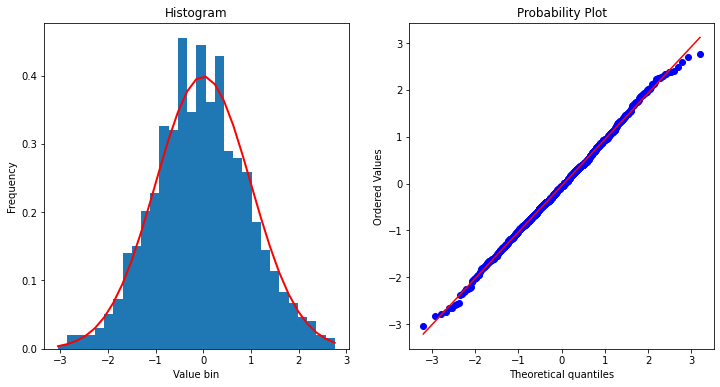

In [22]:
# Run on the initial normally distributed data
plot_histogram_and_qq(points, mu, sigma)

First 10 points (of 1000): [ 2.57523127  1.60422898  3.06462078  3.73260086  2.19798091  3.95386467
  0.91815909 -3.70296317 -3.88598788 -1.263169  ]
count    1000.000000
mean        0.102926
std         2.337933
min        -3.999410
25%        -1.851285
50%         0.225588
75%         2.152776
max         3.988213
dtype: float64
slope, intercept, r: 2.2887559084421074 0.10292591860780509 0.9767335657066321
r is the square root of the coefficient of determination


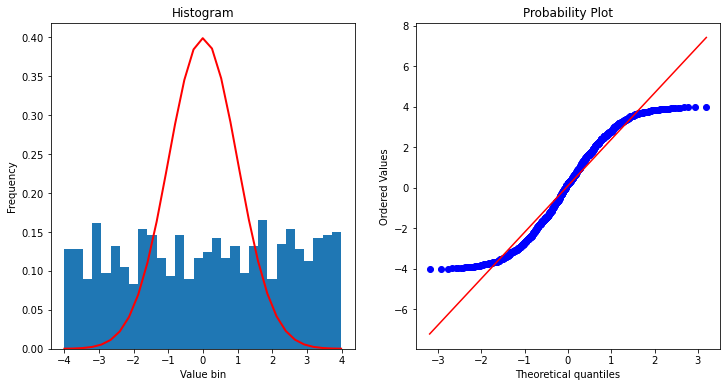

In [23]:
points = np.random.uniform(low=-4, high=4, size=1000)

print("First 10 points (of 1000):", points[:10])
print(pd.Series(points).describe())

# Run on the initial setup
plot_histogram_and_qq(points, mu, sigma)

[0. 0. 0. 0. 0. 0. 0. 0.]
slope, intercept, r: 0.14768759695342298 0.01000000000000001 0.9796285130684926
r is the square root of the coefficient of determination


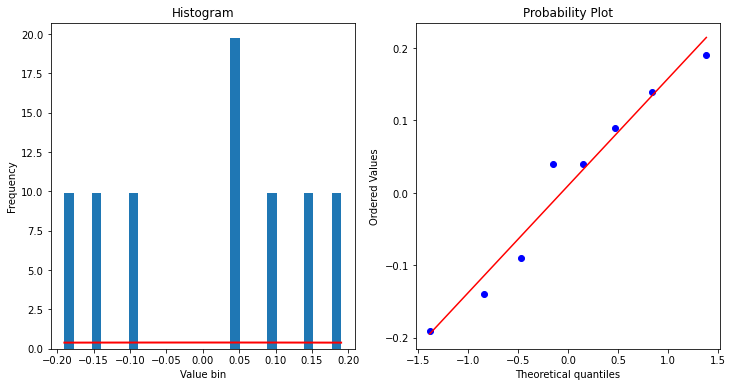

In [24]:


points = (0.04, -0.19, 0.14, -0.09, -0.14, 0.19, 0.04, 0.09)
n = 8
q=np.zeros(n)
print(q)
x = (0.157,-1.535,0.885,-0.487,-0.885 ,1.535 ,0.157 ,0.487 )
for i in range(8):
    q[i]= (i-0.5)/n
mu=0
sigma = 1
plot_histogram_and_qq(points, mu, sigma)



### Q Q Plots: Simple Definition & Example

#### Descriptive Statistics > Q Q plots


Q Q Plots (Quantile-Quantile plots) are plots of two quantiles against each other. A quantile is a fraction where certain values fall below that quantile. For example, the median is a quantile where 50% of the data fall below that point and 50% lie above it. The purpose of Q Q plots is to find out if two sets of data come from the same distribution. A 45 degree angle is plotted on the Q Q plot; if the two data sets come from a common distribution, the points will fall on that reference line.


#### How to Make a Q Q Plot

Sample question: Do the following values come from a normal distribution?
7.19, 6.31, 5.89, 4.5, 3.77, 4.25, 5.19, 5.79, 6.79.

    Step 1: Order the items from smallest to largest.
    Step 2: Draw a normal distribution curve. Divide the curve into n+1 segments. We have 9 values, so divide the curve into 10 equally-sized areas. For this example, each segment is 10% of the area (because 100% / 10 = 10%).
    Step 3: Find the z-value (cut-off point) for each segment in Step 3. These segments are areas, so refer to a z-table (or use software) to get a z-value for each segment.

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
slope, intercept, r: 1.2768810949841627 5.52 0.9896069959517892
r is the square root of the coefficient of determination


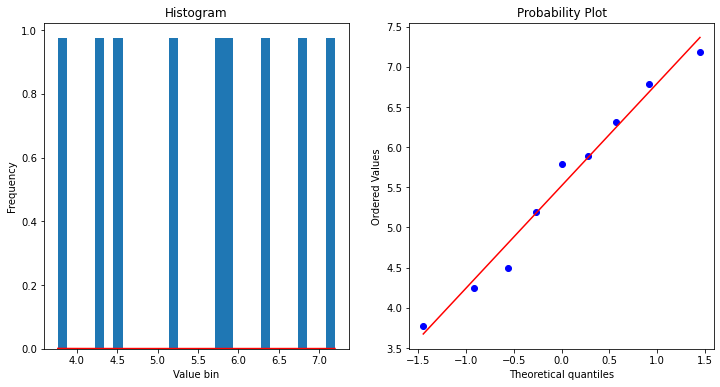

In [25]:
points = ( 7.19, 6.31, 5.89, 4.5, 3.77, 4.25, 5.19, 5.79, 6.79)
n = 9
q=np.zeros(n)
print(q)
for i in range(8):
    q[i]= (i-0.5)/n
mu=0
sigma = 1
plot_histogram_and_qq(points, mu, sigma)

\begin{exercise}
 A distributed system has three file servers, which are chosen independently and with equal probabilities whenever a new file is created. The servers are named A, B, and C. Determine the probabilities of the following events: 
a.  Server A is selected 
b.  Server A or B is selected 
c.  Servers A and B are selected 
d.  Server A is not selected 
e.  Server A is selected twice in a row 
f.  Server selection sequence ABCABCABC is observed (in nine successive file creations) 

\end{exercise}

\begin{exercise}

The traffic arriving at a network gateway is bursty. The burst size x is geometrically distributed with the following pmf. 

$$
f(x)=(1-p)^{x-1} p, \quad x=1,2, \ldots, \infty
$$

Compute the mean, variance, standard deviation, and coefficient of variation of the burst size. Plot the pmf and CDF for P = 0.2. 

\end{exercise}

\begin{exercise}
The number of I/O requests received at a disk during a unit interval follows a Poisson distribution with the following mass function: 

$$
f(x)=\lambda^{x} \frac{e^{-\lambda x}}{x !}, \quad x=0,1,2 \ldots, \infty
$$
Here, $\lambda$ is a parameter. Determine the mean, variance, and coefficient of variation of the number. Plot the pmf and CDF for $\lambda$ = 8.
\end{exercise}
\begin{exercise}
Two Poisson streams  merge at a disk. The pmf for the two streams are as follows: 

$$
f(x)=\lambda^{x} \frac{e^{-\lambda x}}{x !}, \quad x=0,1,2, \ldots, \infty
$$

$$
f(y)=\lambda^{y} \frac{e^{-\lambda y}}{y !}, \quad y=0,1,2, \ldots, \infty
$$
Determine the following: 
a.  Mean of $x + y$ 
b.  Variance of $x + y$ 
c.  Mean of $x - y$ 
d.  Variance of $x - y$ 
e.  Mean of $3x - 4y$ 
f.  Coefficient of variation of $3x - 4y$ 


\end{exercise}

\begin{exercise}
The response time of a computer system has an Erlang distribution with the following CDF: 

$$
F(x)=1-e^{-x / a}\left(\sum_{i=0}^{m-1} \frac{(x / a)^{i}}{i !}\right)
$$

Find expressions for the pdf, mean, variance, mode, and coefficient of variation of the response time. 


\end{exercise}


\begin{exercise}
The execution times of queries on a database is normally distributed with a mean of 5 seconds and a standard deviation of 1 second. Determine the following: 

    a.  What is the probability of the execution time being more than 8 seconds? 
    
    b.  What is the probability of the execution time being less than 6 seconds? 
    
    c.  What percentage of responses will take between 4 and 7 seconds? 
    
    d.  What is the 95-percentile execution time? 

\end{exercise}

\begin{exercise}

Plot a normal quantile-quantile plot for the following sample of errors: -0.04444  -0.04439  -0.04165  -0.03268  -0.03235  -0.03182  0.02771  0.02650  
-0.02569  -0.02358  0.02330  0.02305  0.02213  0.02128  0.01793  0.01668  
-0.01565  -0.01509  0.01432  0.00978  0.00889  0.00687  0.00543  0.00084  
-0.00083  -0.00048  0.00024  0.00079  0.00082  0.00106  0.00110  0.00132  
0.00162  0.00181  0.00280  0.00379  0.00411  0.00424  0.00553  0.00865  
0.01026  0.01085  0.01440  0.01562  0.01975  0.01996  0.02016  0.02078  
0.02134  0.02252  0.02414  0.02568  0.02682  0.02855  0.02889  0.03072  
0.03259  0.03754  0.04263  0.04276  

Are the errors normally distributed? 


\end{exercise}


**exercise 1**

a) $ p(A) = \frac{1}{3}$  
b) $ p(A \cup B) = \frac{2}{3}$  
c) $ p(A \cap B) = 0$  
d) $ p(\neg A) = p(C \cup B) = \frac{2}{3}$  
e) $ p(AA)=p(A) \cdot p(A) = \frac{1}{9}$  
f) $ p(ABCABCABC) = (p(A) \cdot p(B) \cdot p(C))^3 =(\frac{1}{27})^3=\frac{1}{19683}$


**exercise 2**  

$$ E[X]=\mu = \sum _{i = 1} ^{\infty}i(1-p)^{i-1}p = p\sum _{i = 0} ^{\infty}(i+1)(1-p)^{i} = p(\sum _{i = 1} ^{\infty}i(1-p)^{i} + \sum _{i = 0} ^{\infty}(1-p)^{i}) = p(\frac{1-p}{p^2} + \frac{p}{p^2}) = \frac{1}{p} $$

$$ \sigma^2 =E[(x-\mu)^2] = \frac{1-p}{p^2}$$

$$ \sigma = \sqrt{\frac{1-p}{p^2}}$$

$$ c = \frac{\sigma}{\mu} = \sqrt{1-p} $$

In [26]:
def geometric_distribution_pmf(xlin, p):
    y = p*(1-p)**(xlin-1)
    
    return y

def poisson_distribution_pmf(xlin, l):
    y = (np.exp(-l) / array_factorial(xlin))*l**xlin
    return y

def pmftocdf(ypmf, numofpts):
    ycdf = np.empty(numofpts)
    y = 0
    for i in range(0, numofpts):
        y = ypmf[i] + y
        ycdf[i] = y
        
    return ycdf  

def array_factorial(xlin):
    xlinfac = np.empty(len(xlin))
    for i in range(0, len(xlin)):
        xlinfac[i] = math.factorial(xlin[i])
    return xlinfac

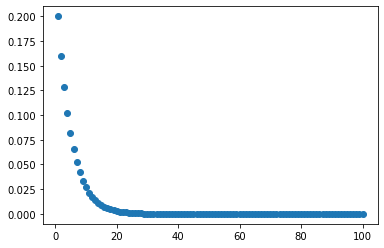

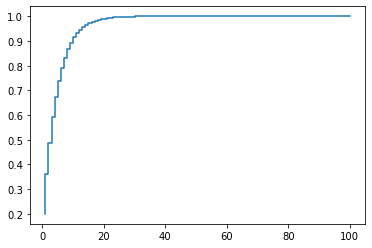

In [27]:
import numpy as np
import matplotlib.pyplot as plt

p=0.2
xlin = np.linspace(1,100, 100)

y_pmf = geometric_distribution_pmf(xlin, p)  
y_cdf = pmftocdf(y_pmf, len(xlin))

plt.figure(1)
plt.plot(xlin, y_pmf,'o')

plt.figure(2)
plt.step(xlin, y_cdf)


**exercise 3**

$$ E[X]=\mu = \lambda $$
$$ \sigma^2 =E[(x-\mu)^2] = \lambda$$
$$  c = \frac{\sigma}{\mu} = \frac{\sqrt{\lambda}}{\lambda}$$

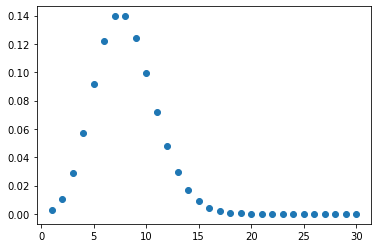

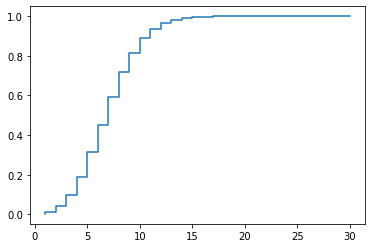

In [28]:
import math 

xlin = np.linspace(1, 30, 30)
l = 8.0
y_pmf = poisson_distribution_pmf(xlin, l)
y_cdf = pmftocdf(y_pmf, len(xlin))

plt.figure(1)
plt.plot(xlin, y_pmf,'o')

plt.figure(2)
plt.step(xlin, y_cdf)

**exercise 4** 

a)$$ E[X+Y] = E[X] + E[Y] = \lambda_x + \lambda_y $$
$$Var[X+Y] = Var[X] + Var[Y] = \lambda_x + \lambda_y $$

b)$$ E[X - Y] = E[X] - E[Y] = \lambda_x - \lambda_y$$
$$ Var[X - Y] = Var[X] - Var[Y] = \lambda_x - \lambda_y $$

c) $$ E[3X - 4Y] = 3E[X] - 4E[Y] = 3\lambda_x - 4\lambda_y$$
$$ Var[3X - 4Y] = 3Var[X] - 4Var[Y] = 3\lambda_x - 4\lambda_y$$
$$ c = \frac{\sqrt{3\lambda_x - 4\lambda_y}}{3\lambda_x - 4\lambda_y}$$

**exercise 5**

$$f_{pdf}(x) ={\displaystyle {\frac {\lambda ^{k}x^{k-1}e^{-\lambda x}}{(k-1)!}}}$$

$$ E[X] = {\displaystyle {\frac {k}{\lambda }}}$$
$$ Var[X] = {\displaystyle {\frac {k}{\lambda ^{2}}}}$$
$$ Mode = 	{\displaystyle {\frac {1}{\lambda }}(k-1)}$$
$$ c = \frac{\sqrt{k}}{k}$$

**exercise 6**

$$ f_{pdf}(x) = {\displaystyle {\frac {1}{{\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({x-5}\right)^{2}}}$$

$$F_{cdf}(x) = {\displaystyle {\frac {1}{2}}\left[1+\operatorname {erf} \left({\frac {x-5 }{{\sqrt {2}}}}\right)\right]} $$

In [29]:
from math import *
from scipy.special import erfinv

def normal_distribution_cdf(x, s, m):
    f = 1/2*(1 + erf((x-m)/s* (2**(1/2))))
    return f

def normal_distribution_cdf_inv(x, s, m):
    f = s* 2 ** (1/2)* erfinv(2*x - 1) + m 
    return f

In [30]:
ycdf8 = 1 - normal_distribution_cdf(8,1,5)
ycdf6 = normal_distribution_cdf(6,1,5)
ycdf4 = normal_distribution_cdf(4,1,5)
ycdf7 = normal_distribution_cdf(7,1,5)

print(ycdf8)
print(ycdf6)
print(ycdf7)
print(ycdf4)
print(ycdf7 - ycdf4)

ycdfinv = normal_distribution_cdf_inv(0.95, 1, 5)
print(ycdfinv)

9.865877004244794e-10
0.9772498680518207
0.9999683287581669
0.022750131948179264
0.9772181968099876
6.644853626951472


a)$$P(x \geq 8) =  1 - P(x \leq 8) = 0.00000001 $$
b)$$P(x \leq 6) = 0.9772498680518207 $$
c)$$P(4 \leq x \leq 7) = P(x \leq 7) - P(x \leq 4) =  0.9772181968099876 $$
$$ 97.72 \% $$
d)$$ 95-Percentile = F^{-1}(0.95) = 6.644 seconds$$

**exercise 7**

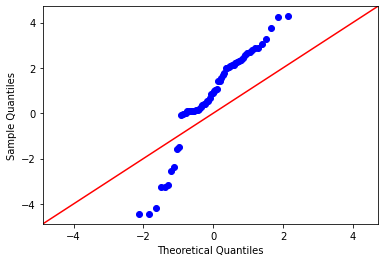

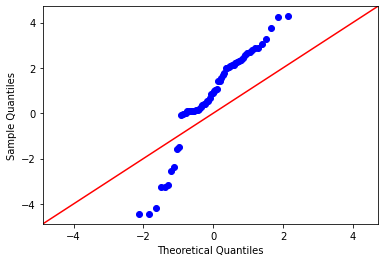

In [31]:
import scipy.stats as stats
import statsmodels.api as sm

x = np.array([-0.04444, -0.04439, -0.04165, -0.03268, -0.03235, -0.03182, 0.02771, 0.02650,
-0.02569, -0.02358, 0.02330, 0.02305, 0.02213, 0.02128, 0.01793, 0.01668,
-0.01565, -0.01509, 0.01432, 0.00978, 0.00889, 0.00687, 0.00543, 0.00084,
-0.00083, -0.00048, 0.00024, 0.00079, 0.00082, 0.00106, 0.00110, 0.00132,
0.00162, 0.00181, 0.00280, 0.00379, 0.00411, 0.00424, 0.00553, 0.00865,
0.01026, 0.01085, 0.01440, 0.01562, 0.01975, 0.01996, 0.02016, 0.02078,
0.02134, 0.02252, 0.02414 ,0.02568 ,0.02682, 0.02855, 0.02889, 0.03072,
0.03259, 0.03754,0.04263, 0.04276])

sm.qqplot(x*100, line ='45')

#  Regression Analysis

Regression analysis is the art and science of fitting straight lines to patterns of data. In a linear regression model, the variable of interest (the so-called "dependent" variable) is predicted from other variable(s) (the so-called "independent" variable(s)) using a linear equation. If $ Y $ denotes the dependent variable, and $ X_1, X_2, \ldots, X_k $, are the independent variables, then the assumption is that the value of $ Y_i $ in the population is determined by the linear equation $$ Y_i = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \ldots + \beta_k X_{ik} + \epsilon_i $$

where the betas are constants and the epsilons are independent and identically distributed (i.i.d.) normal random variables with mean zero (the "noise" in the system). 

$ \beta_0 $ is the so-called intercept of the model -- the expected value of $ Y $ when all the $ X $'s are zero and $ \beta_i $ is the coefficient (multiplier) of the variable $ X_i $. **The betas together with the mean and standard deviation of the epsilons are the parameters of the model.**


The corresponding equation for predicting $ Y_i $ from the corresponding values of the $ X $'s is therefore where the $ b $'s are estimates of the betas obtained by least-squares, i.e., minimizing the square prediction error within the sample. Multiple regression allows more than one $ x $ variables.

**Assumptions**

The error terms $ \epsilon_i $ are mutually independent and identically distributed, with mean = 0 and constant variances $ E[\epsilon_i] = 0 $, $ V[\epsilon_i] = \sigma^2 $.

This is so, because the observations $ Y_1, Y_2, \ldots, Y_k $ are a random sample, they are mutually independent and hence the error terms are also mutually independent.

The distribution of the error term is independent of the joint distribution of $ X_1, X_2, \ldots, X_k $. The unknown parameters $ \beta_0, \beta_1, \beta_2, \ldots, \beta_k $ are constants.

Population regression model showing Normality and homoscedasticity conditions.

<img src="images/Project2--002.png">

### Summary of multiple linear regression model

**Independent variables**: $ X_1, X_2, \ldots, X_k $

**Data**: $ \{ (y_1, x_{11}, x_{21}, \ldots, x_{k1}), \ldots, (y_n, x_{1n}, x_{2n}, \ldots, x_{kn}) \} $

**Population Model**: $ Y_i = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \ldots + \beta_k X_{ik} + \epsilon_i $ where $ \epsilon_i $ are i.i.d. random variables following the normal disribution $ N(0, \sigma) $.

**Regression coefficients**: $ b_0, b_1, \ldots, b_k $ are estimates of $ \beta_0, \beta_1, \ldots, \beta_k $.

**Regression Estimates of $ Y_i $**: $ \widehat{y} = b_0 + b_1 x_{i1} + b_2 x_{i2} + \ldots + b_k x_{ik} $.

**Goal**: Choose $ b_0, b_1, \ldots, b_k $ to minimize the residual sum of squares $ \sum\limits_{i=1}^{n} e_i^2 = \sum\limits_{i=1}^{n}(y_i - \widehat{y}_i)^2 $.

### Summary of single variable linear regression model

Assuming that the data is a subset of a population then the linear regression model can be described as follows:

**Data**: $ \{ (x_1, y_1), \ldots, (x_n, y_n) \} $

**Model of the Population**: $ y_i = \beta_0 + \beta_1 x_i + \epsilon_i $ where $ \epsilon_1, \epsilon_2, \ldots, \epsilon_n $ are independent and identically distributed (i.i.d.) random variables, with normal distribution $ N(0, \sigma) $.

This is the true relation between $ y $ and $ x $ that depends on the estimation of the unknowns $ \beta_0 $ and $ \beta_1 $ based on a sample (data) of the population.

**Comments**:

$ E(y_i \mid x_i) = \beta_0 + \beta_1 x_i $

$ SD(y_i \mid x_i) = \sigma $

Relationship is linear -- described by a "line"

$ \beta_0 = $ "baseline or intercept" value of (i.e., value of $ y $ if $ x $ is $ 0 $)

$ \beta_1 = $ "slope" of line (average change in $ y $ per unit change in $ x $)

**Prediction regression model**:

$ \widehat{y}_i = \beta_0 + \beta_1 x_i $
where the $ b $'s are estimates of the betas obtained by least-squares, i.e., minimizing the square prediction error within the sample.

<img src="images/Project2--003.png">

In [32]:
# improve functionality of Python 2

from __future__ import division
from __future__ import print_function

In [33]:
# library imports

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from scipy import stats

In [34]:
# plotting settings

%matplotlib inline

aspect_ratio = 16 / 9

figure_width = 10
figure_height = figure_width / aspect_ratio
figsize = (figure_width, figure_height)

In [35]:
data = pd.read_csv("2.2.2_example.txt", delimiter='\t')

In [36]:
data

,Region,x,y
0,Maine,1.8,104
1,New Hampshire,1.2,68
2,Vermont,0.4,39
3,Massachusetts,0.5,43
4,Connecticut,2.5,127
5,Rhode Island,2.5,134
6,New York,1.5,87
7,New Jersey,1.2,77
8,Pennsylvania,1.6,102
9,Delaware,1.0,65


<pre>
x: First-Year Advertising Expenditures ($ millions)

y: First-Year Sales ($ millions)
</pre>

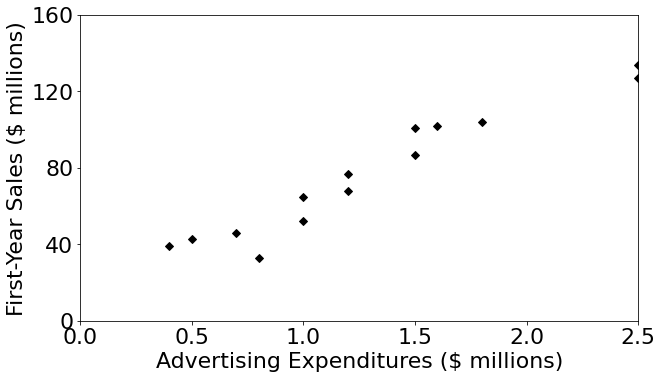

In [37]:
plt.figure(figsize=figsize)
xmin = 0
xmax = 2.5
plt.xlim(xmin, xmax)
ymin = 0
ymax = 160
plt.ylim(ymin, ymax)
plt.yticks(range(0, 160+1, 40))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.plot(data.x, data.y, 'D', color='black')
plt.xlabel("Advertising Expenditures ($ millions)", fontsize=22)
plt.ylabel("First-Year Sales ($ millions)", fontsize=22)
plt.show()

**a) How to relate advertising expenditure to sales?**

**b) What is expected first-year sales if advertising expenditure is $2.2 million?**

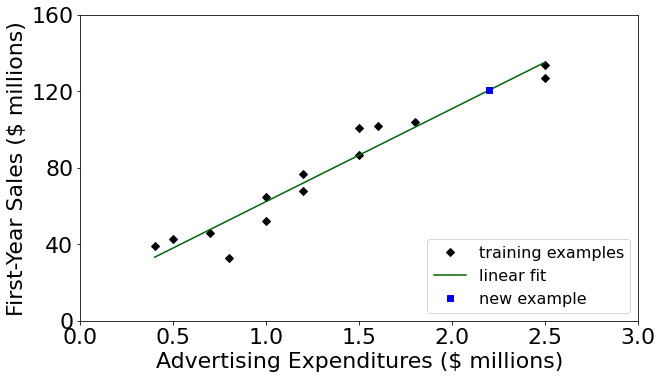

In [38]:
lm = smf.ols("y ~ x", data=data).fit()

plt.figure(figsize=figsize)
xmin = 0
xmax = 3
plt.xlim(xmin, xmax)
ymin = 0
ymax = 160
plt.ylim(ymin, ymax)
plt.yticks(range(0, 160+1, 40))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.plot(data.x, data.y, 'D', color='black', label='training examples')
plt.xlabel("Advertising Expenditures ($ millions)", fontsize=22)
plt.ylabel("First-Year Sales ($ millions)", fontsize=22)

X = np.linspace(min(data.x), max(data.x), 100)
intercept = lm.params[0]
slope = lm.params[1]
Y = intercept + slope * X
plt.plot(X, Y, color='darkgreen', label='linear fit')

new_example = 2.2
prediction = lm.predict({'x': [new_example]})
plt.plot(new_example, prediction, 's', color='blue', label='new example')

plt.legend(loc='lower right', fontsize=16)

plt.show()

In [39]:
lm.summary()

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     158.4
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           2.84e-08
Time:                        17:24:14   Log-Likelihood:                -49.711
No. Observations:                  14   AIC:                             103.4
Df Residuals:                      12   BIC:                             104.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8237      5.579      2.478      0.029       1.668      25.980
x             48.5971      3.862     12.584      0.000      40.183      57.011
==============================================================================
Omnibus:                        2.084   Durbin-Watson:                   1.046
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                0.821
Skew:                          -0.588   Prob(JB):                        0.663
Kurtosis:                       3.156   Cond. No.                         4.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**c) How confident is your estimate? How good is the "fit"?**

The R-squared of the regression model is 0.930 which is very high and imply a very good fit.

Alternatively:

## Standard deviation of errors

Since errors are obtained after calculating two regression parameters from the data, errors have $n − 2$ degrees of freedom. Thus, the variance estimate is $SSE/(n − 2)$ is called mean squared errors or $(MSE)$       
$ S_e^{2} = \frac{SSE}{n-2}$

Standard deviation of errors = square root of MSE= $\sqrt(MSE)$

Note:

$SSY$ has n degrees of freedom since it is obtained from n independent observations without estimating any parameters

$SS0$ has just one degree of freedom since it can be computed simply from $\bar{y}

$SST$ has $n − 1$ degrees of freedom, since one parameter must be calculated from the data before $SST$ can be computed

$SSR$, which is the difference between $SST$ and $SSE$, has the remaining one degree of freedom.

Overall,

$SST = SSY − SS0 = SSR + SSE$

$n −1 = n −1 = 1+(n − 2)$

Notice that the degrees of freedom add just the way the sums of squares do.

### Example 2:

For the disk I/O-CPU data verify the following:

### SS:

In [40]:
SSy = sum(df.CPU_Time * df.CPU_Time)
SSy

828

In [41]:
#Number of Observations
n=len(df)
n

7

Alternatively:

In [42]:
n= lm.nobs
n

14.0

In [43]:
SSO = n*np.mean(df.CPU_Time)**2
SSO

1244.5714285714287

In [44]:
SST= SSy-SSO  
SST

-416.57142857142867

In [45]:
SST= SSR + SSE
SST

205.71428571428567

### DF:

In [46]:
aov_table = sm.stats.anova_lm(lm, typ=2)
print(aov_table)
df_SSE = aov_table.df[1]
df_SSE

                sum_sq    df           F        PR(>F)
x         13130.942446   1.0  158.353965  2.843305e-08
Residual    995.057554  12.0         NaN           NaN


12.0

In [47]:
df_SSR = aov_table.df[0]
df_SSR

1.0

In [48]:
df_SST = df_SSR +  df_SSE
df_SST

13.0

Alternatively:

In [49]:
df_SS0 = 1.0
df_SS0

1.0

In [50]:
df_SSy = n
df_SSy

14.0

In [51]:
df_SST = df_SSy - df_SS0
df_SST

13.0

The mean squared error is:

In [52]:
MSE = SSE/df_SSE
MSE

0.4890736493374182

Alternatively:

In [53]:
MSE = lm.mse_resid
MSE

82.9214628297362

The standard deviation of errors is:

In [54]:
s_e = math.sqrt(MSE)
s_e

9.106122271841961

# Regression Statistics

<img src="images/Project2--008.png">

<img src="images/Project2--009.png">

In [55]:
# read data into a DataFrame
df = pd.read_csv('chapter6.txt', delimiter='\t', index_col=0)
print(list(df.columns))
df.columns = ['X','Y']
df.Y

['X', 'Y']


1     126
2     114
3      89
4     130
5     152
6     110
7     144
8     146
9     139
10    104
11    160
12    134
13    155
14    138
15    186
16    160
17    177
18    144
19    174
20    180
Name: Y, dtype: int64

In [56]:
# create a fitted model in one line
lm = smf.ols(formula='Y ~ X ', data=df).fit()
xmin = df.X.min()
xmax = df.X.max()
X = np.linspace(xmin, xmax, 100)

# beta0
intercept = lm.params[0]
# beta1
slope = lm.params[1]

## Polynomial fit

In [57]:
Y = intercept + slope * X
print("f(t) = %f + %f*x" % (intercept, slope))

f(t) = 109.168421 + 3.231579*x


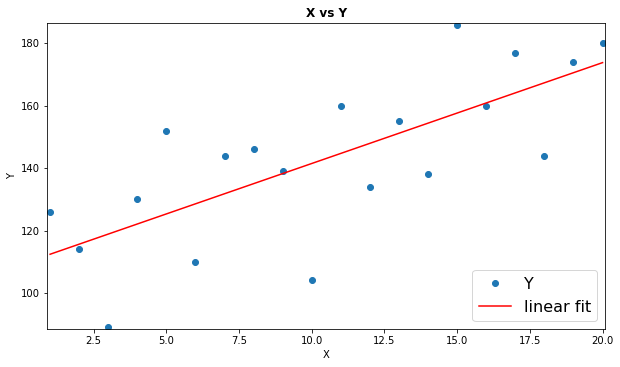

In [58]:
plt.figure(figsize=figsize)
plt.plot(df.X, df.Y, 'o',label='Y')
plt.plot(X, Y, color='red', label='linear fit')
plt.margins(0.005)
plt.title("X vs Y", weight='bold')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower right', fontsize=16)
plt.show()


In [59]:
#Estimate
predictedValues=lm.predict()
df['Predictions'] = predictedValues

#Error
res = df.Y-predictedValues
df['Residuals'] = res

#Error^2
res_2 = res**2
df['Residuals ^2'] = res_2
print(df)

     X    Y  Predictions  Residuals  Residuals ^2
1    1  126   112.400000  13.600000    184.960000
2    2  114   115.631579  -1.631579      2.662050
3    3   89   118.863158 -29.863158    891.808199
4    4  130   122.094737   7.905263     62.493186
5    5  152   125.326316  26.673684    711.485429
6    6  110   128.557895 -18.557895    344.395457
7    7  144   131.789474  12.210526    149.096953
8    8  146   135.021053  10.978947    120.537285
9    9  139   138.252632   0.747368      0.558560
10  10  104   141.484211 -37.484211   1405.066039
11  11  160   144.715789  15.284211    233.607091
12  12  134   147.947368 -13.947368    194.529086
13  13  155   151.178947   3.821053     14.600443
14  14  138   154.410526 -16.410526    269.305374
15  15  186   157.642105  28.357895    804.170194
16  16  160   160.873684  -0.873684      0.763324
17  17  177   164.105263  12.894737    166.274238
18  18  144   167.336842 -23.336842    544.608199
19  19  174   170.568421   3.431579     11.775734


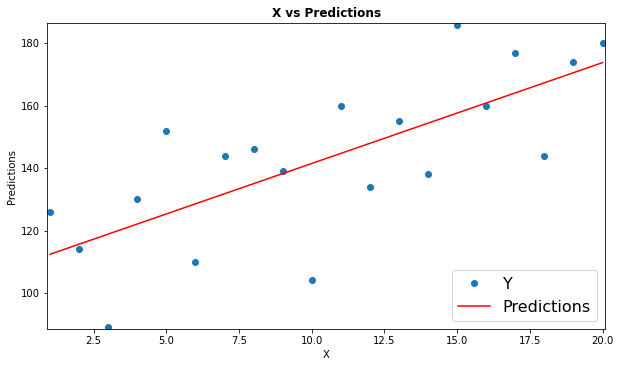

In [60]:
plt.figure(figsize=figsize)
plt.plot(df.X, df.Y, 'o',label='Y')
plt.plot(df.X, df.Predictions, color='red',label='Predictions')
plt.margins(0.005)
plt.title("X vs Predictions", weight='bold')
plt.xlabel("X")
plt.ylabel("Predictions")
plt.legend(loc='lower right', fontsize=16)
plt.show()

In [61]:
#Number of observations
n= len(df)
n

20

Alternatively:

In [62]:
n = lm.nobs
n

20.0

In [63]:
#Mean Y
meanY = np.mean(df.Y)
meanY

143.1

In [64]:
#Sample Standard Deviation of Y
STD_Y = np.std(df.Y,ddof = 1)
STD_Y

26.25362130409722

In [65]:
#Mean X
meanX = np.mean(df.X)
meanX

10.5

In [66]:
#Sample Standard Deviation of X
STD_X = np.std(df.X,ddof = 1)
STD_X

5.916079783099616

In [67]:
#Correlation of X,Y
df.corr()

,X,Y,Predictions,Residuals,Residuals ^2
X,1.000000e+00,0.728215,1.000000e+00,9.204559e-16,-0.122912
Y,7.282149e-01,1.000000,7.282149e-01,6.853488e-01,-0.362903
Predictions,1.000000e+00,0.728215,1.000000e+00,1.026264e-15,-0.122912
Residuals,9.204559e-16,0.685349,1.026264e-15,1.000000e+00,-0.398916
Residuals ^2,-1.229125e-01,-0.362903,-1.229125e-01,-3.989158e-01,1.000000


In [68]:
#Rquared ((correlation of X,Y) ^2)
R_quared = lm.rsquared
R_quared

0.5302969774962001

In [69]:
#Adgusted Rquared 
Adj_Rquared = lm.rsquared_adj
Adj_Rquared

0.5042023651348779

In [70]:
#Standard Error of regression
STDE_reg = math.sqrt(1-Adj_Rquared) * STD_Y
STDE_reg

18.485935858414187

In [71]:
#slope
slope

3.231578947368418

In [72]:
#Standard Error of Slope 
STDE_slope = (STDE_reg/math.sqrt(n))*(1/np.std(df.X,ddof =0))
STDE_slope

0.7168538452367272

Alternatively:

In [73]:
STDE_slope = lm.bse.X 
STDE_slope

0.7168538452367272

In [74]:
#T-stat of SLOPE 
t_stat_slope = slope/STDE_slope
t_stat_slope

4.508002529164437

Alternatively:

In [75]:
t_stat_slope = lm.tvalues.X
t_stat_slope

4.508002529164437

In [76]:
#p-value of Slope
p_value_slope = lm.f_pvalue
p_value_slope

0.0002721537632911407

In [77]:
#Intercept
intercept

109.16842105263159

In [78]:
#Standard Error of intercept 
STDE_interc =lm.bse.Intercept
STDE_interc

8.587298701239103

In [79]:
#T-stat of intercept 
t_stat_interc = intercept/STDE_interc
t_stat_interc

12.712777888683336

Alternatively:

In [80]:
t_stat_interc = lm.tvalues.Intercept
t_stat_interc

12.712777888683336

In [81]:
#Confidence Level
conf_level = 0.95
conf_level

0.95

In [82]:
#Critical t-value
critical_t_val = stats.t.ppf((1-(1-conf_level)/2),n-2)
critical_t_val

2.10092204024096

In [83]:
x = 21
x

21

In [84]:
#Forecast at x
forecact_x = intercept + x*slope
forecact_x

177.03157894736836

In [85]:
#Standard Error of mean at x 
STD_mean_x = (STDE_reg/math.sqrt(n))*math.sqrt(1+((x-meanX)**2)/np.var(df.X,ddof =0))
#STD_mean_x = stats.sem(df.X, ddof = 0)
STD_mean_x

8.587298701239106

In [86]:
#Lower 95% conf limit for mean
forecact_x - (critical_t_val * STD_mean_x )

158.99033383980256

In [87]:
#Upper 95% conf limit for mean
forecact_x + critical_t_val * STD_mean_x 

195.07282405493416

In [88]:
#Standard Error of forecast at x LOOK AGAIN
STD_forec_x = math.sqrt(STDE_reg**2 + STD_mean_x**2)
STD_forec_x

20.383118592249478

In [89]:
#Lower 95% conf limit for forecast
forecact_x - (critical_t_val * STD_forec_x )

134.20823584806612

In [90]:
#Upper 95% conf limit for forecast
forecact_x + (critical_t_val * STD_forec_x )

219.8549220466706

## CIs for regression parameters

1. Regression coefficients $ \beta_0 $ and $ \beta_1 $ are estimates from a single random sample of size $ n \ge 1 $.

2. Using another sample, the estimates may be different.


Thus, the coefficients are random in the same way as the sample mean or any other parameter computed from a smaple.

Using a single sample, only probabilistic statements can be made about true parameters.

**If $ \beta_0 $ and $ \beta_1 $ are true regression parameters of the population (i.e., $ y = \beta_0 + \beta_1 x + \epsilon $), then the computed coefficients $ b_0 $ and $ b_1 $ are estimates of $ \beta_0 $ and $ \beta_1 $, respectively.**

Sample standard deviation of $ b_0 $ and $ b_1 $ from the population parameters can be computed as follows:

$ s_{b_0} = s_e \left[ \dfrac{1}{n} + \dfrac{ \overline{x}^2 }{ \sum x^2 - n \overline{x}^2 } \right]^{1/2} $

$ s_{b_1} = \dfrac{ s_e }{ \left[ \sum x^2 - n \overline{x}^2 \right]^{1/2} } $

Here the $ s_e $ is the standard devation of errors and $ \overline{x} $ is the sample mean of $ x $.

The $ 100 (1 - a) \% $ confidence intervals (interval that contains the coefficient values) for $ \beta_0 $ and $ \beta_1 $ can be computed using $ t_{[1 - a/2; n - 2]} $ -- the $ 1 - a / 2 $ quantile of a $ t $ variate with $ n - 2 $ degrees of freedom or with $ 100 (1 - a) $ percent confidence.

The confidence intervals are:

$ b_0 \mp t s_{b_0} $

$ b_1 \mp t s_{b_1} $

If a confidence interval includes zero, then the regression parameter cannot be considered different from zero at the $ 100 (1 - a) \% $ confidence level.

Notice that the $ t_{[1 - a/2; n - 2]} $ is computed by the following table.

## Example 

For the disk I/O and CPU data, we have $ n = 7 $, $ \overline{x} = 38.71 $, $ \sum{x^2} = 13855 $ and $ s_e = 1.0834 $.

1) standard deviations of $ b_0 $ and $ b_1 $ are

$ s_{b_0} = s_e \left[ \dfrac{1}{n} + \dfrac{ \overline{x}^2 }{ \sum x^2 - n \overline{x}^2 } \right]^{1/2} = 0.8311 $

$ s_{b_1} = \dfrac{ s_e }{ \left[ \sum x^2 - n \overline{x}^2 \right]^{1/2} } = 0.0187 $

In [91]:
ex1 = pd.read_csv('example_1.txt', delimiter='\t', index_col=0)
print(list(ex1.columns))
ex1.columns = ['Disk_IOs','CPU_Time']
ex1

['Disk I/Os', 'CPU Time']


,Disk_IOs,CPU_Time
1,14,2
2,16,5
3,27,7
4,42,9
5,39,10
6,50,13
7,83,20


In [92]:
n = len(ex1)
n

7

In [93]:
x_bar = ex1.Disk_IOs.mean()
x_bar

38.714285714285715

In [94]:
sum_x_squared = sum(ex1.Disk_IOs ** 2)
sum_x_squared

13855

In [95]:
lm = smf.ols(formula='CPU_Time ~ Disk_IOs ', data=ex1).fit()
s_e = math.sqrt(lm.mse_resid)
s_e

1.0834097832352196

In [96]:
sb0 = s_e * (1 / n + x_bar ** 2 / (sum_x_squared - n * x_bar ** 2)) ** 0.5
sb0

0.8311049969529885

In [97]:
sb1 = s_e / (sum_x_squared - n * x_bar ** 2) ** 0.5
sb1

0.018681065725824817

2) For the 0.95-quantile of a t-variate with 5 degrees of freedom is 2.015 $ \Rightarrow $ 90% compute the confidence interval for $ b_0 $ and $ b_1 $.

Since, the confidence interval includes zero, the hypothesis that this parameter is zero cannot be rejected at 0.10 significance level $ \Rightarrow b $ is essentially zero.

90% Confidence Interval for $ b_1 $ is: $ 0.2438 \mp 0.0376 = (0.2061, 0.2814) $

Since the confidence interval does not include zero, the slope $ b_1 $ is significantly
different from zero at this confidence level.

<img src="images/Project2--011.png">

<img src="images/Project2--012.png">



\begin{exercise}




The performance of a remote procedure call (RPC) mechanism was compared on two operating systems named UNIX and ARGUS. The performance metric was total elapsed time, which was measured for various data sizes. The measurements are shown in Table below.

1) Plot the scatter diagrams of the two data sets along with the regression lines a for UNIX and ARGUS, respectively.

2) Notice that for large data sizes the variance of both data sets is large.  This is because ARGUS measurements are affected by the garbage collection and UNIX measurements are affected by a page optimization technique that avoids copying of complete data pages by mapping the pages from the input buffer into the kernel instead of the normal copying.

3) Compute the 90% confidence intervals for regression coefficients for RPC study.

4) How much of the variation is explained by regression in the two data sets?

5) Compute the Best linear models for UNIX and ARGUS

6) Does ARGUS takes larger time per byte as well as a larger set up time per call than UNIX?

7) Intervals for intercepts overlap while those of the slopes do not. What does it mean?

<img src="images/Project2--013.png">
\end{exercise}

**1) Plot the scatter diagrams of the two data sets along with the regression lines a for UNIX and ARGUS, respectively.**

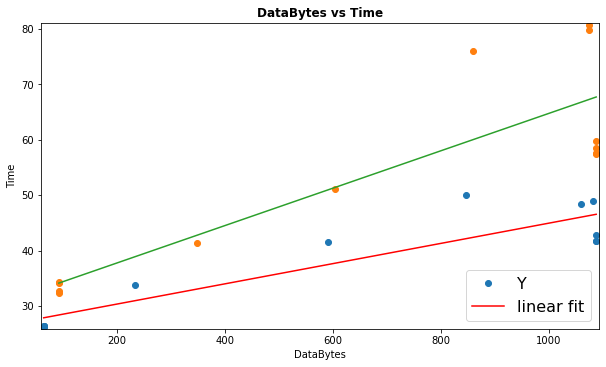

In [99]:
dfUnix = pd.read_csv('Unix')
dfArgus = pd.read_csv('Argus')


lmUnix = smf.ols(formula='Time ~ DataBytes', data=dfUnix).fit()
xmin = dfUnix.DataBytes.min()
xmax = dfUnix.DataBytes.max()
XUnix = np.linspace(xmin, xmax, 1000)

# beta0
interceptUnix = lmUnix.params[0]
# beta1
slopeUnix = lmUnix.params[1]

lmArgus = smf.ols(formula='Time ~ DataBytes', data=dfArgus).fit()
xmin = dfArgus.DataBytes.min()
xmax = dfArgus.DataBytes.max()
XArgus = np.linspace(xmin, xmax, 1000)

# beta0
interceptArgus = lmArgus.params[0]
# beta1
slopeArgus = lmArgus.params[1]


YUnix = interceptUnix + slopeUnix * XUnix
plt.figure(figsize=figsize)
plt.plot(dfUnix.DataBytes, dfUnix.Time, 'o',label='Y')
plt.plot(XUnix, YUnix, color='red', label='linear fit')
plt.margins(0.005)
plt.title("DataBytes vs Time", weight='bold')
plt.xlabel("DataBytes")
plt.ylabel("Time")
plt.legend(loc='lower right', fontsize=16)

YArgus = interceptArgus + slopeArgus * XArgus
plt.plot(dfArgus.DataBytes, dfArgus.Time, 'o',label='Y')
plt.plot(XArgus, YArgus, label='linear fit')

**3) Compute the 90% confidence intervals for regression coefficients for RPC study.**

In [100]:
conf_level = 0.90
critical_t_val = stats.t.ppf((1-(1-conf_level)/2),11)
s_eUnix = math.sqrt(lmUnix.mse_resid)
nUnix = len(dfUnix)
x_barUnix = dfUnix.Time.mean()
sum_x_squaredUnix = sum(dfUnix.Time ** 2)
sb0Unix = s_eUnix * (1 / nUnix + x_barUnix ** 2 / (sum_x_squaredUnix - nUnix * x_barUnix ** 2)) ** 0.5
conf_b0_Unix1 = interceptUnix - critical_t_val*sb0Unix 
conf_b0_Unix2 = interceptUnix + critical_t_val*sb0Unix
print("For b0:",conf_b0_Unix1, conf_b0_Unix2)

sb1Unix = s_eUnix / (sum_x_squaredUnix - nUnix * x_barUnix ** 2) ** 0.5
conf_b1_Unix1 = slopeUnix - critical_t_val*sb1Unix 
conf_b1_Unix2 = slopeUnix + critical_t_val*sb1Unix
print("For b1:",conf_b1_Unix1, conf_b1_Unix2)

For b0: 17.681391354088262 35.809990067883
For b1: -0.21439211747097062 0.25084921279780437


In [101]:
conf_level = 0.90
critical_t_val = stats.t.ppf((1-(1-conf_level)/2),11)
s_eArgus = math.sqrt(lmArgus.mse_resid)
nArgus = len(dfArgus)
x_barArgus = dfArgus.Time.mean()
sum_x_squaredArgus = sum(dfArgus.Time ** 2)
sb0Argus = s_eArgus * (1 / nArgus + x_barArgus ** 2 / (sum_x_squaredArgus - nArgus * x_barArgus ** 2)) ** 0.5
conf_b0_Argus1 = interceptArgus - critical_t_val*sb0Argus 
conf_b0_Argus2 = interceptArgus + critical_t_val*sb0Argus
print("For b0",conf_b0_Argus1, conf_b0_Argus2)

sb1Argus = s_eArgus / (sum_x_squaredArgus - nArgus * x_barArgus ** 2) ** 0.5
conf_b1_Argus1 = slopeArgus - critical_t_val*sb1Argus 
conf_b1_Argus2 = slopeArgus + critical_t_val*sb1Argus
print("For b1:",conf_b1_Argus1, conf_b1_Argus2)

For b0 15.787972611641026 46.34748635645165
For b1: -0.2380177188061999 0.30541852910744366


**4) How much of the variation is explained by regression in the two data sets?**

In [102]:
R_squaredUnix = lmUnix.rsquared
print("Unix:",R_squaredUnix)
print("Argus:", lmArgus.rsquared)

Unix: 0.8322202171667668
Argus: 0.7481900182594209


**5) Compute the Best linear models for UNIX and ARGUS**

To find the best model we compute the smf.ols python function looking for the largest R and F values and the samllest Prob(F-statistic) value. Also the slope and intercept must have the highest possible significance.

In [103]:
lmUnix.summary()

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     49.60
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           3.53e-05
Time:                        17:29:09   Log-Likelihood:                -32.844
No. Observations:                  12   AIC:                             69.69
Df Residuals:                      10   BIC:                             70.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.7457      1.974     13.549      0.000      22.347      31.144
DataBytes      0.0182      0.003      7.043      0.000       0.012       0.024
==============================================================================
Omnibus:                        0.876   Durbin-Watson:                   0.720
Prob(Omnibus):                  0.645   Jarque-Bera (JB):                0.723
Skew:                           0.499   Prob(JB):                        0.697
Kurtosis:                       2.330   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
logdfUnix=np.log10(dfUnix)
lmlogUnix = smf.ols(formula='Time ~ DataBytes', data=logdfUnix).fit()
lmlogUnix.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     148.6
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           2.52e-07
Time:                        17:29:29   Log-Likelihood:                 26.004
No. Observations:                  12   AIC:                            -48.01
Df Residuals:                      10   BIC:                            -47.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0703      0.042     25.781      0.000       0.978       1.163
DataBytes      0.1949      0.016     12.190      0.000       0.159       0.230
==============================================================================
Omnibus:                        0.465   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.214
Skew:                           0.288   Prob(JB):                        0.899
Kurtosis:                       2.689   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Having tested different models with the known transformations, we chose the log(x),log(y) transform as the best. Scatter plots and residuals are analyzed below to make sure the model is valid.

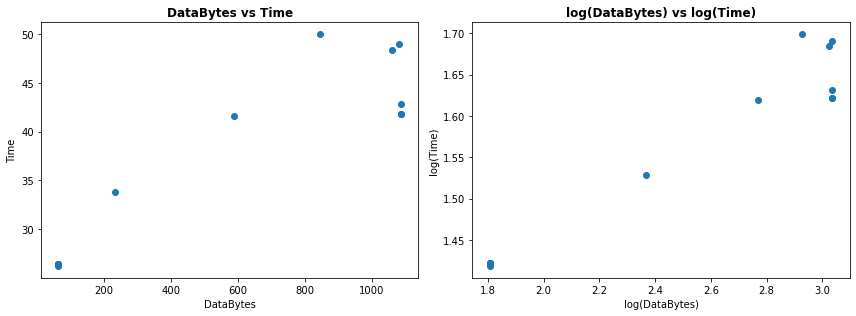

In [105]:
# scatter plots of the different models 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4.5))
axes[0].plot(dfUnix.DataBytes, dfUnix.Time, 'o')
axes[0].set_title("DataBytes vs Time", weight='bold')
axes[0].set(xlabel='DataBytes', ylabel='Time')

axes[1].plot(logdfUnix.DataBytes, logdfUnix.Time, 'o')
axes[1].set_title("log(DataBytes) vs log(Time)", weight='bold')
axes[1].set(xlabel='log(DataBytes)', ylabel='log(Time)')
plt.tight_layout()

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.graphics.gofplots import ProbPlot


def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):

  if not model_fit:
      model_fit = sm.OLS(y, sm.add_constant(X)).fit()

  # create dataframe from X, y for easier plot handling
  dataframe = pd.concat([X, y], axis=1)

  # model values
  model_fitted_y = model_fit.fittedvalues
  # model residuals
  model_residuals = model_fit.resid
  # normalized residuals
  model_norm_residuals = model_fit.get_influence().resid_studentized_internal
  # absolute squared normalized residuals
  model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
  # absolute residuals
  model_abs_resid = np.abs(model_residuals)
  # leverage, from statsmodels internals
  model_leverage = model_fit.get_influence().hat_matrix_diag
  # cook's distance, from statsmodels internals
  model_cooks = model_fit.get_influence().cooks_distance[0]
    
  

  plot_lm_1 = plt.figure()
  plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

  plot_lm_1.axes[0].set_title('Residuals vs Fitted')
  plot_lm_1.axes[0].set_xlabel('Fitted values')
  plot_lm_1.axes[0].set_ylabel('Residuals');
  # annotations
  abs_resid = model_abs_resid.sort_values(ascending=False)
  abs_resid_top_3 = abs_resid[:3]
  for i in abs_resid_top_3.index:
      plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));
    
 
  QQ = ProbPlot(model_norm_residuals)
  plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
  plot_lm_2.axes[0].set_title('Normal Q-Q')
  plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
  plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
  # annotations
  abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
  abs_norm_resid_top_3 = abs_norm_resid[:3]
  for r, i in enumerate(abs_norm_resid_top_3):
      plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

  
  plot_lm_3 = plt.figure()
  plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
  sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_3.axes[0].set_title('Scale-Location')
  plot_lm_3.axes[0].set_xlabel('Fitted values')
  plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
  abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
  abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
  for i in abs_norm_resid_top_3:
      plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));


  plot_lm_4 = plt.figure();
  plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
  sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
  plot_lm_4.axes[0].set_ylim(-3, 5)
  plot_lm_4.axes[0].set_title('Residuals vs Leverage')
  plot_lm_4.axes[0].set_xlabel('Leverage')
  plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
  leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
  for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

  p = len(model_fit.params) # number of model parameters
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
  graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
  plot_lm_4.legend(loc='upper right');

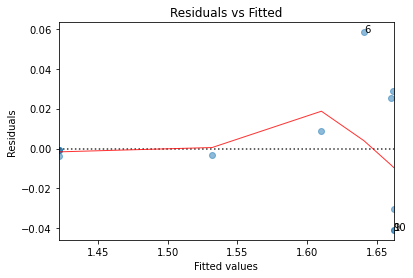

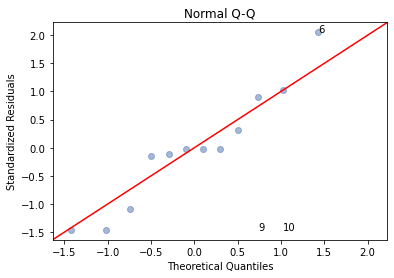

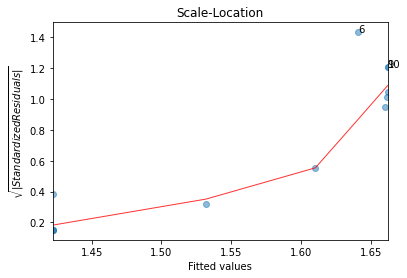

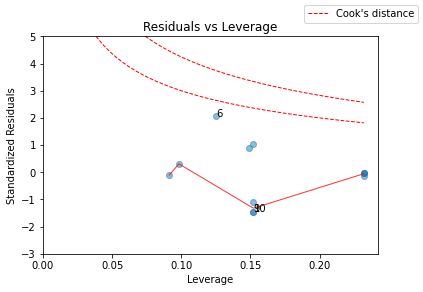

In [107]:
diagnostic_plots(logdfUnix.DataBytes,logdfUnix.Time)

In [108]:
# by hand calculation of the model 
N = len(logdfUnix)
SXY = sum(logdfUnix.DataBytes * logdfUnix.Time)
SX = sum(logdfUnix.DataBytes)
SYY = sum(logdfUnix.Time ** 2)
SY = sum(logdfUnix.Time)
SXX = sum(logdfUnix.DataBytes ** 2)
X_mean = np.mean(logdfUnix.DataBytes)
Y_mean = np.mean(logdfUnix.Time)

In [109]:
b1= slope = (SXY-N*X_mean*Y_mean)/(SXX-N*(X_mean)**2)
X = logdfUnix.DataBytes
b0=intercept = Y_mean - slope*X_mean
Y = intercept + slope * X
print("Best model:\n")
print("log(Time) =",b1,"* log(DataBytes) +",b0)

Best model:

log(Time) = 0.19486333734329728 * log(DataBytes) + 1.070257178603791


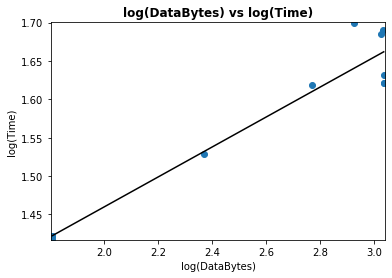

In [110]:
plt.plot(logdfUnix.DataBytes,logdfUnix.Time, 'o')
plt.plot(X, Y, color='black')
plt.margins(0.005)
plt.title("log(DataBytes) vs log(Time)", weight='bold')
plt.xlabel("log(DataBytes)")
plt.ylabel("log(Time)")
plt.show()

We apply the same procedure for the Argus operating system:

In [111]:
lmArgus.summary()

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     32.68
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           0.000135
Time:                        17:32:30   Log-Likelihood:                -46.394
No. Observations:                  13   AIC:                             96.79
Df Residuals:                      11   BIC:                             97.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.0677      4.711      6.595      0.000      20.700      41.436
DataBytes      0.0337      0.006      5.717      0.000       0.021       0.047
==============================================================================
Omnibus:                        1.496   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                1.170
Skew:                           0.620   Prob(JB):                        0.557
Kurtosis:                       2.209   Cond. No.                     1.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
invTime=1/(dfArgus.Time)
lmInvArgus = smf.ols(formula='invTime ~ DataBytes', data=dfArgus).fit()
lmInvArgus.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                invTime   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     81.99
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           1.97e-06
Time:                        17:32:54   Log-Likelihood:                 60.331
No. Observations:                  13   AIC:                            -116.7
Df Residuals:                      11   BIC:                            -115.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0305      0.001     23.773      0.000       0.028       0.033
DataBytes  -1.452e-05    1.6e-06     -9.055      0.000    -1.8e-05    -1.1e-05
==============================================================================
Omnibus:                        1.207   Durbin-Watson:                   0.643
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                0.977
Skew:                          -0.491   Prob(JB):                        0.614
Kurtosis:                       2.085   Cond. No.                     1.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

scatter plots and residuals analysis:

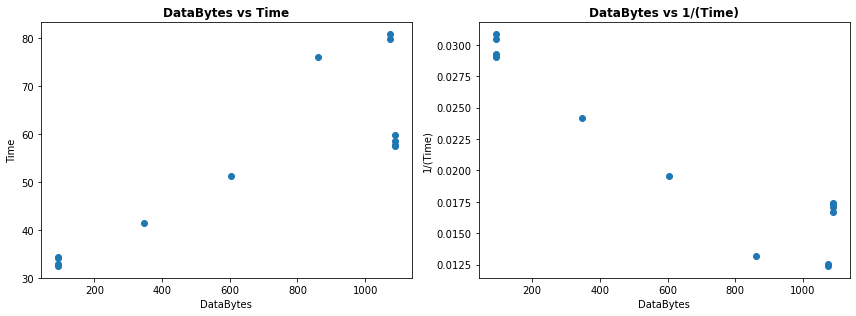

In [113]:
# scatter plots of the different models 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4.5))
axes[0].plot(dfArgus.DataBytes, dfArgus.Time, 'o',label='Y')
axes[0].set_title("DataBytes vs Time", weight='bold')
axes[0].set(xlabel='DataBytes', ylabel='Time')

axes[1].plot(dfArgus.DataBytes, 1/dfArgus.Time, 'o',label='Y')
axes[1].set_title("DataBytes vs 1/(Time)", weight='bold')
axes[1].set(xlabel='DataBytes', ylabel='1/(Time)')
plt.tight_layout()

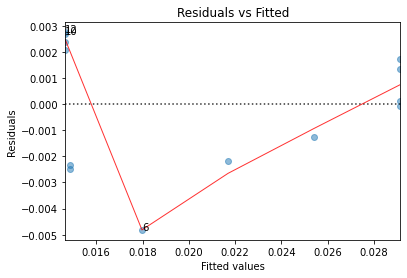

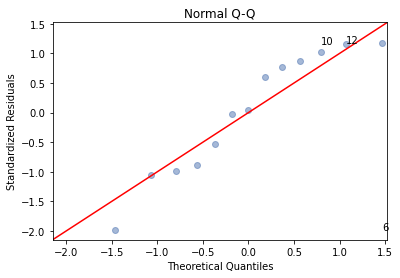

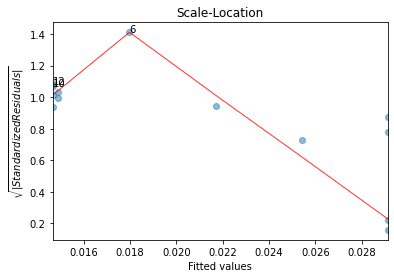

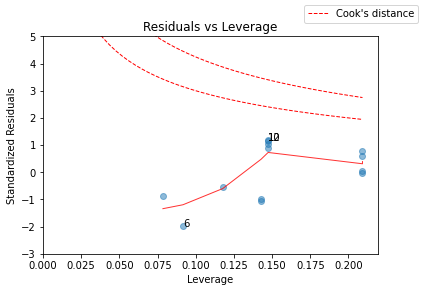

In [114]:
diagnostic_plots(dfArgus.DataBytes,1/dfArgus.Time)

In [115]:
# calculating the model using the lm function
b0 = lmInvArgus.params[0]
b1 = lmInvArgus.params[1]
X=dfArgus.DataBytes
Y = b0 + b1 * X
print("Best model:\n")
print("1/(Time) =",b1,"* DataBytes +",b0)

Best model:

1/(Time) = -1.4519999420697842e-05 * DataBytes + 0.030462799946107313


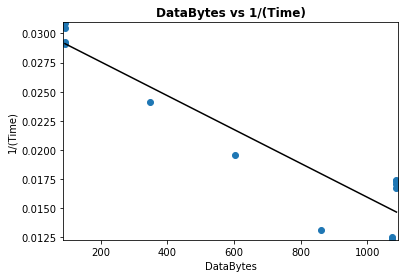

In [116]:
plt.plot(dfArgus.DataBytes,1/dfArgus.Time, 'o')
plt.plot(X, Y, color='black')
plt.margins(0.005)
plt.title("DataBytes vs 1/(Time)", weight='bold')
plt.xlabel("DataBytes")
plt.ylabel("1/(Time)")
plt.show()

**6) Does ARGUS takes larger time per byte as well as a larger set up time per call than UNIX?**

In order to compare the two operating systems, we use the linear regression method without any transformations. The models that occur may not reveal the best linear relation between variables, but they provide the best estimates to compare each other.

In [117]:
# as found earlier these models are:
print("Time_Argus =",slopeArgus,"* DataBytes +",interceptArgus,)
print("Time_Unix =",slopeUnix,"* DataBytes +",interceptUnix)

Time_Argus = 0.03370040515062187 * DataBytes + 31.067729484046335
Time_Unix = 0.018228547663416868 * DataBytes + 26.74569071098563


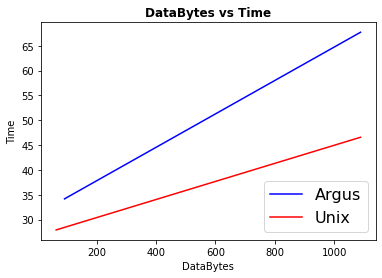

In [118]:
# as seen in the plot of exercise 1
plt.plot(XArgus, YArgus,color='blue', label='Argus')
plt.plot(XUnix, YUnix, color='red',label='Unix')
plt.title("DataBytes vs Time", weight='bold')
plt.xlabel("DataBytes")
plt.ylabel("Time")
plt.legend(loc='lower right', fontsize=16)

It is clear from the models and plot that the ARGUS operating system takes a larger time per byte.

**7) Intervals for intercepts overlap while those of the slopes do not. What does it mean?**

It means that the elapsed time for data size zero may be the same in the two operating systems. The slopes do not overlap because the rate at which elapsed time increases as data sizes increase is different for each system.

## CI for predications

The purpose of developing regression usually is to predict the value of the response variable for those values of predictor variables that have not been measured.

Given the regression equation, it is easy to predict the response $\widehat{y_{p}}$ for any given value of predictor variable $x_{p}$:
				 \widehat{y_{p}}=b_{0}+b_{1}x_{p} 
                 
This is only the mean value of the predicted response based upon the sample.

Like most of the other computations based on the sample, it is necessaryto specify a confidence interval for this predicted mean. The formula for the standard deviation of the mean of a future sample of $m$ observations is:

$s_{ \widehat{y}_{mp}} = s_{e}\left [ \frac{1}{m}+ \frac{1}{n}+ \frac{(x_{p}- \overline{x})^{2}}{\sum(x^{2})-n( \overline{x})^{2}}\right ]  ^{ \frac{1}{2}} $

$m= 1 \rightarrow$  Standard deviation of a single future observation:

$m= \infty \rightarrow$  Standard deviation of the mean of a large number of future observations at $x_{p} $:

$s_{ \widehat{y}_{mp}} = s_{e}\left [  \frac{1}{n}+ \frac{(x_{p}- \overline{x})^{2}}{\sum(x^{2})-n( \overline{x})^{2}}\right ]  ^{ \frac{1}{2}}$

Notice that the standard deviation for the mean of an infinite future sample is lower than that of finite samples since in the latter case the error associated with the future observations should also be accounted for.
In all cases discussed above, a $100(1-a)\%$  confidence interval for the mean can be constructed using a $t$ quantile read at $n-2$ degrees of freedom.

Standard deviation of the prediction is minimal at the center of the measured range (i.e.,
when $x=x$); Goodness of the prediction decreases as we move away
from the center.

<img src="images/Project2--015.png">

\begin{exercise}
Using the disk $I/O$ and $CPU$ time data of Example above, estimate the $CPU$ time for a program with $100$ disk $I/O$’s, compute the standard deviation of errors, the standard deviation of the predicted mean of a large number of observations $s_{ \widehat{y}_{p}} $, from table above, find the $0.95$-quantile of the $t$-variate with $5$ degrees of freedom, the $90\%$ $CI$ for the predicted mean, compute the $CPU$ time of a single future program with $100$ disk $I/O$’s with $90\%$ $CI$ for a single prediction.
\end{exercise}




In [119]:
dfUnix = pd.read_csv('Unix')

In [123]:
df1=pd.read_csv('example1')
lm1 = smf.ols(formula='Y ~ X', data=df1).fit()
beta0 = lm1.params[0]
beta1 = lm1.params[1]
print("CPU_time =",beta1,"* I/Os","+",beta0 )
print("\nfor I/Os = 100 , CPU_time =", beta1*100+beta0 )
# find 
N1=len(df1)
SXY1 = sum(df1.X * df1.Y)
SYY1 = sum(df1.Y **2)
SY1 = sum(df1.Y)
SSE1 = SYY1-beta0*SY1-beta1*SXY1
MSE1= SSE1/(N1-2)
sde=np.sqrt(MSE1)
print("\nStandard deviation of errors =",sde)
Syp1=sde*(1/N1+(((100-x_bar)**2)/(sum_x_squared-N1*x_bar**2)))**(1/2)
print("\nThe standard deviation of the predicted mean of a large number of observations is:",Syp1)
pred_mean=beta1*100+beta0
print("\n0.95-quantile of the t-variate with 5 degrees of freedom:",stats.t.ppf(0.95, 5) )
ci1=pred_mean-Syp1*stats.t.ppf(0.95, 5)
ci2=pred_mean+Syp1*stats.t.ppf(0.95, 5)
ci=[ci1,ci2]
print("\n90% CI for the predicted mean : ",ci)

CPU_time = 0.24375637104994904 * I/Os + -0.008282364933743125

for I/Os = 100 , CPU_time = 24.36735474006116

Standard deviation of errors = 1.083409783235228

The standard deviation of the predicted mean of a large number of observations is: 1.2159104545761243

0.95-quantile of the t-variate with 5 degrees of freedom: 2.015048372669157

90% CI for the predicted mean :  [21.917236357256126, 26.817473122866193]


### Outline

• Definition of a Good Model

• Estimation of Model parameters

• Allocation of Variation

• Standard deviation of Errors

• Confidence Intervals for Regression Parameters

• Confidence Intervals for Predictions

• **Visual Tests for verifying Regression Assumption**

## Visual test for regress assumptions

Regression assumptions:

The true relationship between the response variable y and the predictor
variable x is linear.

The predictor variable x is non-stochastic and it is measured without any
error.

The model errors are statistically independent.

The errors are normally distributed with zero mean and a constant standard
deviation.

If any of the assumptions are violated, the conclusions based on the regression
model would be misleading. In this section, we describe a number of visual
techniques to verify that these assumptions hold. Unlike statistical tests, all
visual techniques are approximate. However, we have found them useful for
two reasons. First, they are easier to explain to decision makers who may not
understand statistical tests. Second, they often provide more information than
a simple “pass-fail” type answer obtained from a test. Often, using a visual
test, one can also find the cause of the problem.

## Visual test for linear relationship

Independent Errors: After the regression, compute errors and prepare a scatter plot of $ \in i $ versus the predicted response . Any visible trends in the scatter plot would indicate a dependence of errors on the predictor variable. In the Figure below shows three hypothetical plots of error versus predicted response. In case (a), there is no visible trend or clustering of points, and therefore, the errors appear to be independent. In case (b), we see that the errors increase with increasing response. In case (c), the trend is nonlinear. Any such trend is indicative of an inappropriate model. It is quite possible that a linear model is not appropriate for this case.

<img src="images/Project2--016.png">

## Visual test for independent errors
Scatter plot of $ \varepsilon_i $ versus the predicted response $ \widehat{y}_i $.

<img src="images/Project2--018.png">

Any trend would imply the dependence of errors on predictor variable $ \Rightarrow $ curvilinear model or transformation.

In practice, dependence can be proven yet independence cannot.

Plot the residuals as a function of the experiment number

<img src="images/Project2--020.png">

Any trend would imply that other factors (such as environmental conditions or side effects) should be considered in the modeling.

## Visual test for "normal distribution of errors"

Prepare a normal quantile-quantile plot of errors.

Linear $\Rightarrow$  the assumption is satisfied

<img src="images/Project2--022.png">

## Visual test for constant standard deviation of errors

Also known as **homoscedasticity**.

To verify it, observe the scatter plot of errors versus predicted responseprepared for the independence test. If the spread in one part of the graph seems significantly different than that in other parts, then the assumption of constant
variance is not valid. 

The Figure below shows two hypothetical examples. 

In case (a), the spread is homogeneous. In case (b), the spread appears to be
increasing as the predicted response increases. This implies that the distribution
of the errors still depends on the predictor variables. The regression model does
not fully incorporate the e↵ect of predictors. The linear model is not a good
model in this case.
<img src="images/Project2--024.png">

Trend $\Rightarrow$ Try curvilinear regression or transformation

## Summary

• Definition of a Good Model

• Estimation of Model parameters

• Allocation of Variation

• Standard deviation of Errors

• Confidence Intervals for Regression Parameters

• Confidence Intervals for Predictions

• Visual Tests for verifying Regression Assumption

<img src="images/Project2--026.png">

\begin{exercise}
The time to encrypt a k-byte record using an encryption technique is shown in the following Table. Fit an optimal linear regression model to this data. First try to identify a linear model with non zero intersect. Use the statistical data (i.e. confidence interval) to accept or reject the model. Explain. Second, try to generate a linear model with zero intersect. What do you observe?

\end{exercise}



**TABLE: Measured Encryption Times for Various Record Sizes**

<img src="images/Project2--027.png">

# Review Questions


### **1. How does regression differ from correlation?**

Correlation is a measure to express the extent to which variables involved are linearly related. Regression on the other hand, is a method that provides an equation which estimates how related variables affect each other.


### **2. How does an algebraic line differ from a statistical line?**

Algebraic lines mostly appear in the form y=mx+b as statistical lines usualy have the form y=a+bx. In statistical line 'b' is called slope and describes the average rate of change between the independent and dependent variables. The other constant 'a' is called intercept and describes the average response of the dependent variable when the independent variable equals zero.


### **3. Lines are characterized by their slope and intercept. What does the slope tell you about the line? What does the intercept tell you? What does a slope of 0 indicate?**

The slope gives us an idea of how much a change in the independent variable affect the dependent one. The slope is the steepness of a line. The larger the value of the slope, the steeper the line.The intercept can give us information about where the line crosses the y axis.A line with slope 0 is horizontal , statisticly speaking if a regression line has a slope of zero then the variables are not related as the null hypothesis criteria is not met .

### **4. What is ”squared” in a least squared regression line?**

The residual errors. The observations, most often than not, will not be a part of the estimated regression line, the goal is to minimize this distance between the estimated value of the line and the actual observed one. To do so, the residuals are squared and then summed up. The line that provides the smallest sum is the best estimate for a regression line.

### **5. Suppose the relation between AGE (years) and HEIGHT (inches) in an adolescent population is described              by this model: = 46 + 1.5X. Interpret the slope of this model.Then, predict the average height of a 10 year-old**

According to the slope of the line, the average adolescent grows by 1.5 inches each year. Using the line as an predictor , a 10year-old should be  (10⋅1.5)+46=15+46=61  inches tall.


### **6. What t value do you use when calculating a $95\%$ confidence interval for b when n = 25?**

Computing: stats.t.ppf(1 - 0.05/2, 24) = t = 2.0639 .

### **7. What symbol is used to denote the slope in the data?**

The symnbol  $ \\ \beta_{1} $ .


### **8. What symbol is used to denote the slope in the population?**

The symbol $ \\ B_{1} $ .


### **9. The Normality and equal variance assumptions for regression refer to the distribution of the **residuals****.

True .

### **10. What is a residual?**

Residuals in a statistical model are the differences between observed and predicted values of data.

### **11. What distributional conditions are necessary to help infer population slope beta?**

As stated in a previous question residuals must be nearly normaly distributed and have a seemingly constant variance. 


### **12. Assuming that the 90% confidence interval of the slope contains zero (0). What that implies?**

This implies that there is no correlation between the variables we examine.

In [124]:
#question 6 
stats.t.ppf(1 - 0.05/2, 24) 

2.0638985616280205